# Project Name: Automobile Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df = pd.read_csv('Automobile_data.csv') # Importing the data
df.head()  # It print first 5 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Replace missing values in a specific column with the mean
column_name = "normalized-losses"
df[column_name].replace("?", float("NaN"), inplace=True)

# Convert the column to numeric data type
df[column_name] = pd.to_numeric(df[column_name])

# Calculate the mean of the column
mean_value = df[column_name].mean()

# Fill missing values with the mean
df[column_name].fillna(mean_value, inplace=True)

# Display the updated DataFrame
print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [4]:
# finding the shape of our dataset
df.shape

(205, 26)

# EDA and Data Preprocessing
EDA is the process of investingating the dataset to discover hidden patterns, 
anomalies(outliers), relationship and form hypotheses based on our understanding of the dataset. 
EDA involves generating summary statistics for numerical data in the dataset and creating various graphical
representation to understand the data in better way.

In [5]:
# Let's get some information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# checking for null values using missingno module
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
#Let us start by looking at descriptive statistic parameters for the dataset.
#We will use describe() for this.
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Different types of features
There are mainly two types of featuers.

1. Numerical Features.    
2. Categorical Features.

1. Numerical Fetures
Attributes that have numerical values. It can be further divided into categories.      
a) Discrete Numerical Feature  -- Discrete variables are countable in a finite amount of time. Like book, pen, money, etc. 
b) Continuous Numerical Feature  -- Continuous Variables would (literally) take forever to count. Like teim, age,etc.

2. Categorical Feature
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.

This can be further calssified into ainly tow types.
    a) Nomial -- Nomail are variables that have two or more categories whic do not have any kind of order associated with them.
    b) Ordinal -- On the other hand, ordinal valriables ia a categorical feature whic can be ordered according to ther entires.

# Now working with Numerical Features

In [8]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'object'] ]

print("Number of Numerical Variable ", len(numerical_feature))

df[numerical_feature].head()


Number of Numerical Variable  11


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [9]:

df = df[df["price"] != "?"]
df["price"] = df["price"].replace("?", np.nan)
df["price"] = pd.to_numeric(df["price"])
df["price"] = pd.to_numeric(df["price"], errors="coerce")


E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


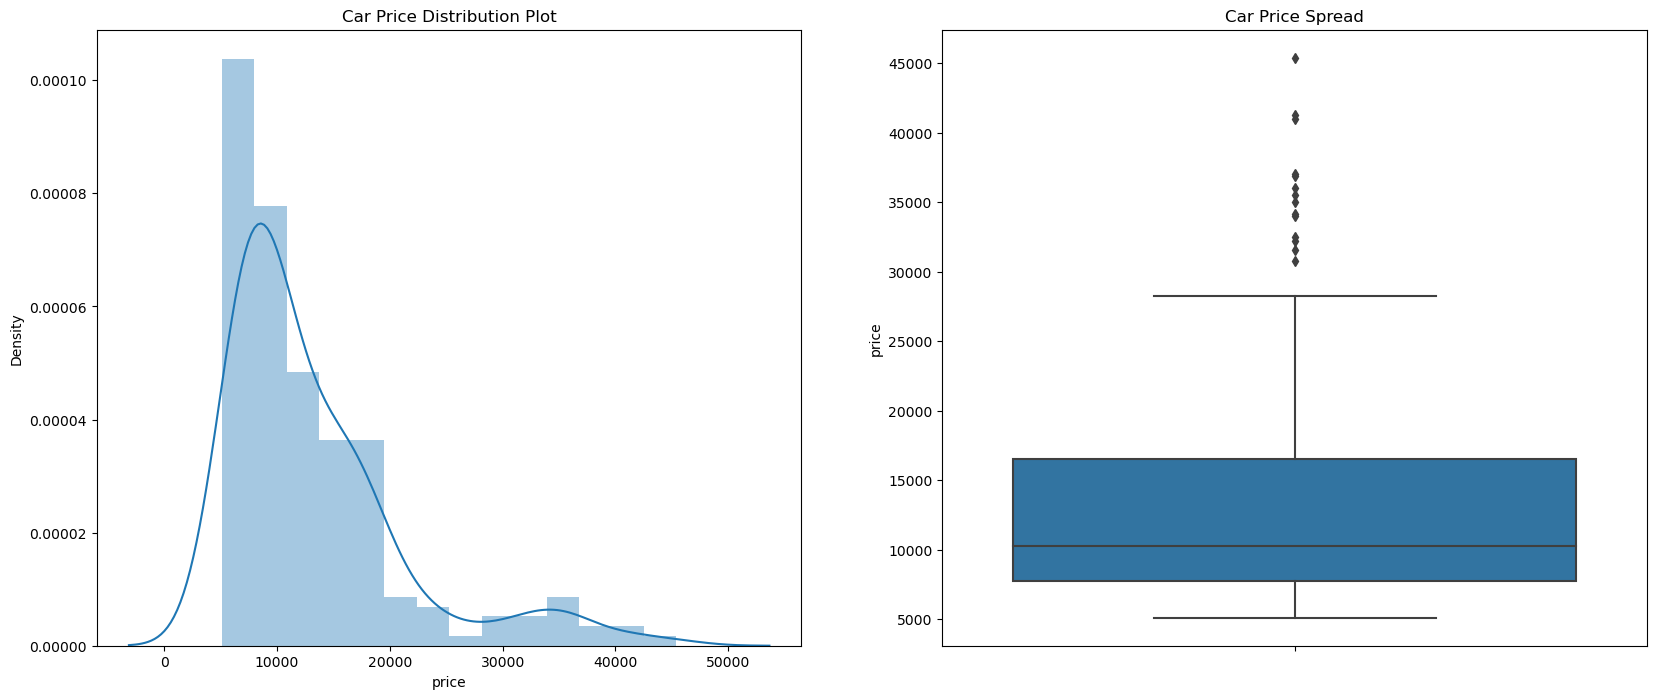

In [10]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["price"])

plt.show()

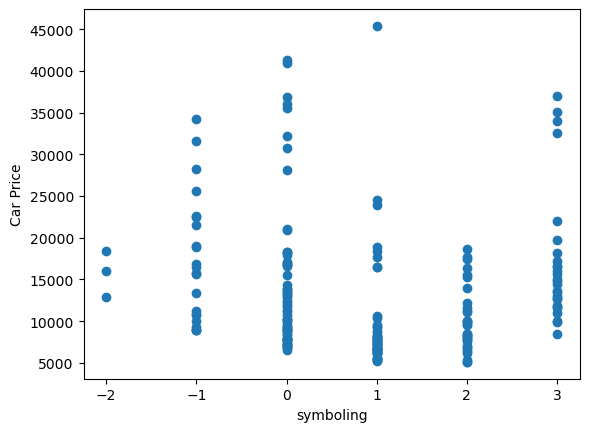

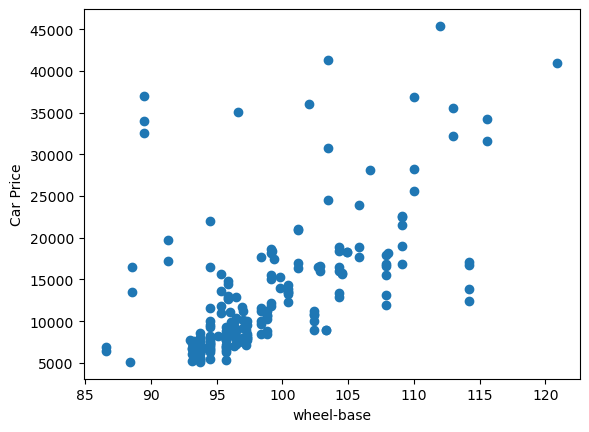

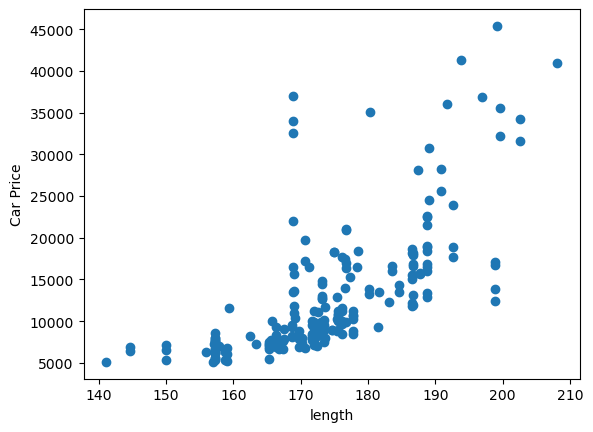

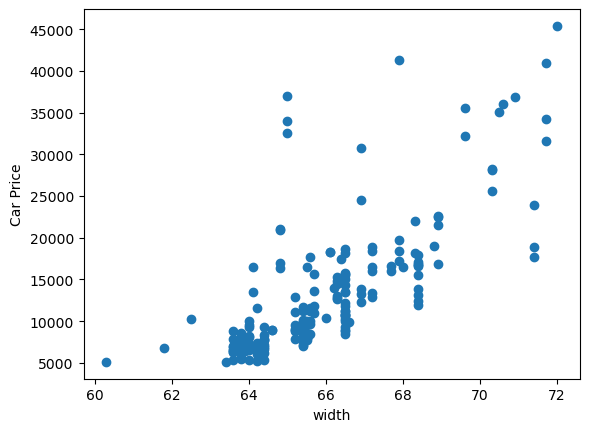

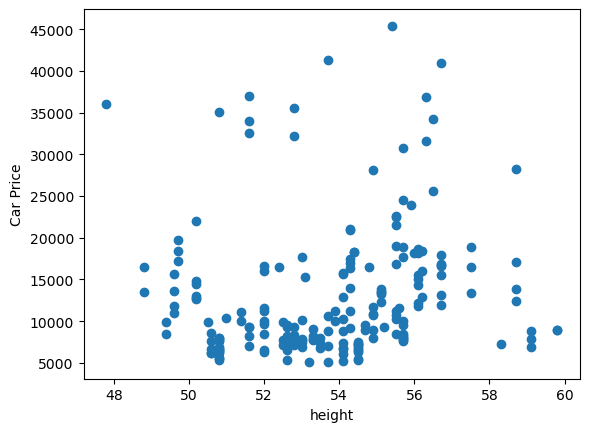

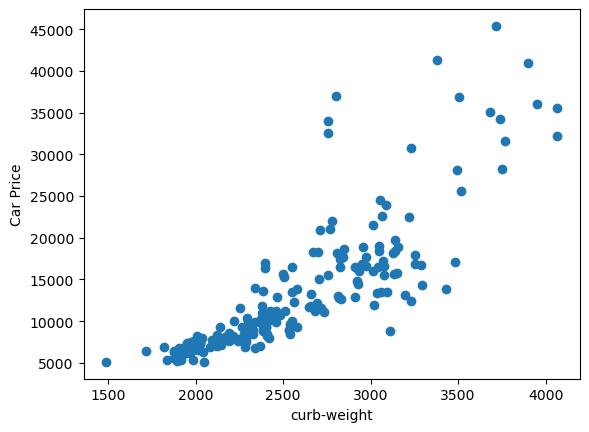

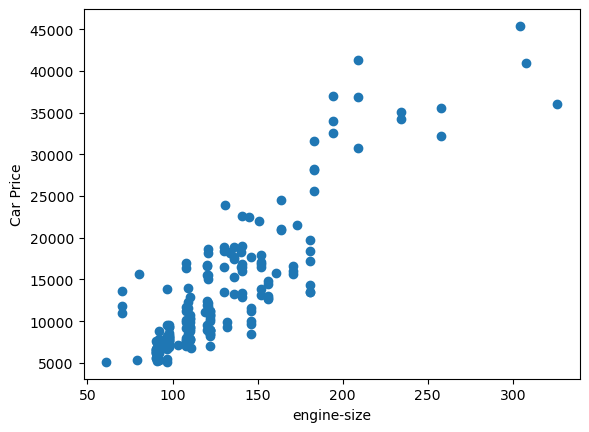

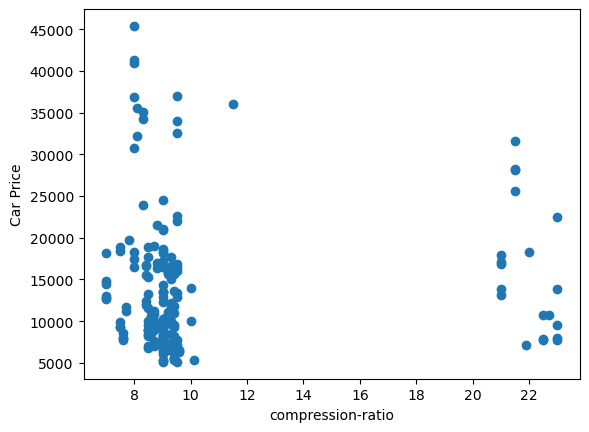

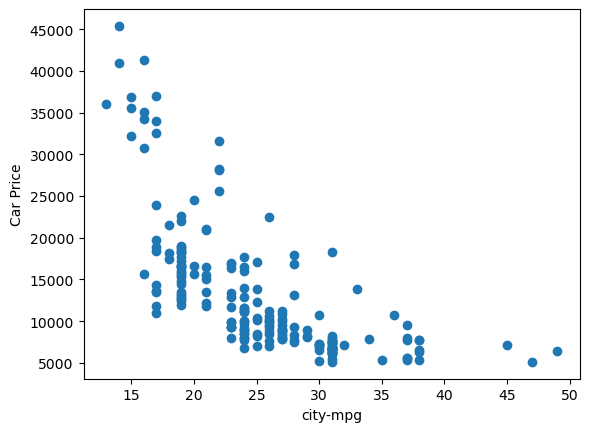

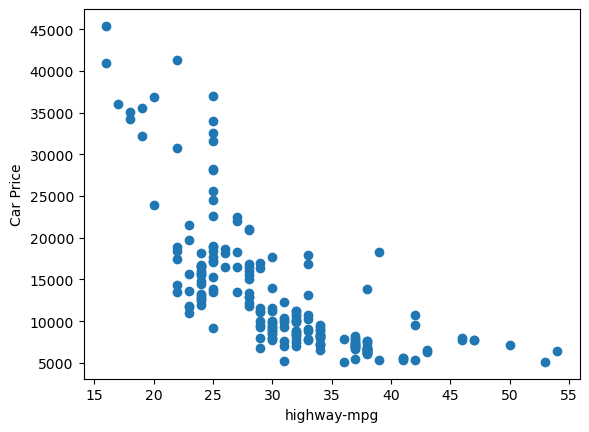

In [11]:
# Now let's find the relationship between independent and dependent numerical features

for feature in numerical_feature:
    if feature not in ["normalized-losses"]:
        plt.scatter(y=df["price"], x=df[feature])
        plt.ylabel("Car Price")
        plt.xlabel(feature)
        plt.show()

## Let's find the relationship between each feature with others.
We will now look at the correlation between them and plot with the help of a heatmap.

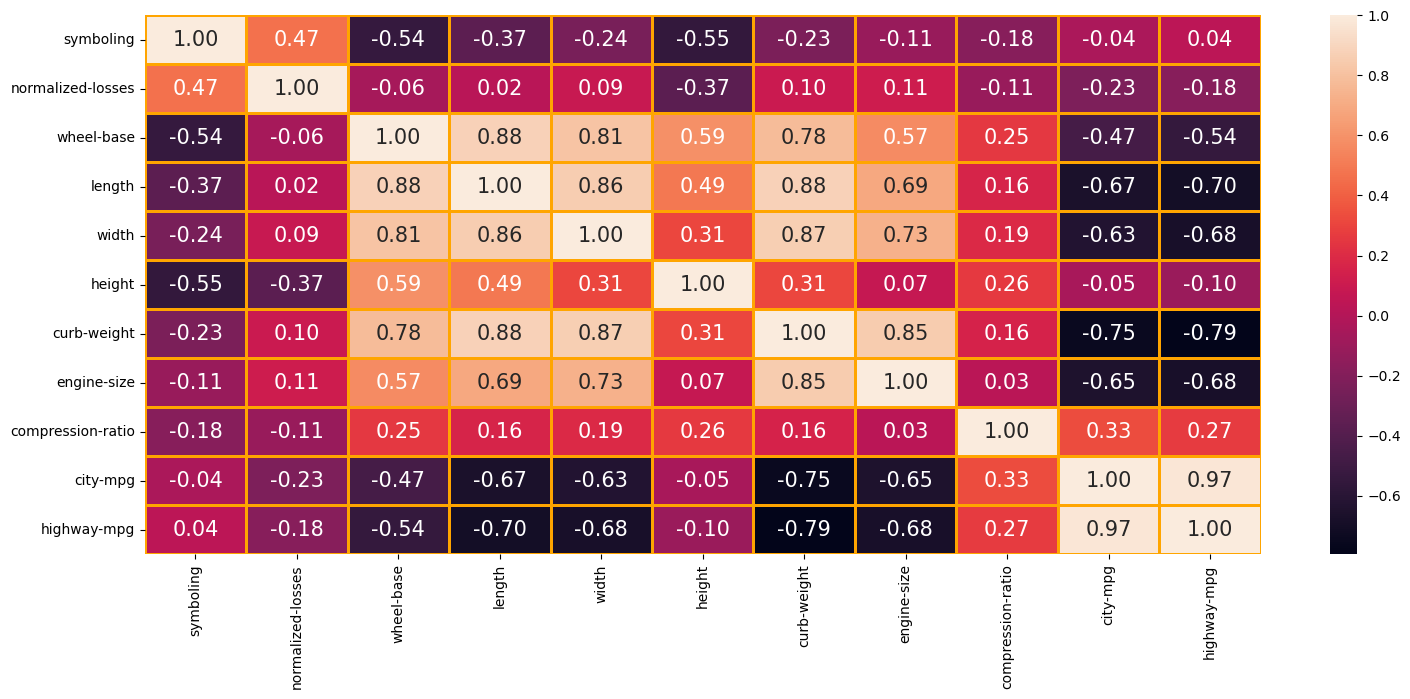

In [12]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df[numerical_feature].corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

correlation of numerical variables

wheelbase have positive correlation with price of 58%.
car length and car width have positive correlation with price of 68% and 76%.
curbweight have positive correlation with price of 84%.
enginesize have positive correlation with price of 87%.
boreratio have positive correlation with price of 55%.
horsepower have positive correlation with price of 81%.
citympg and highwaympg have negative correlation with price of 69% and 70%.

# Let's find the distribution for each of these numerical features and also check for outliers.

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


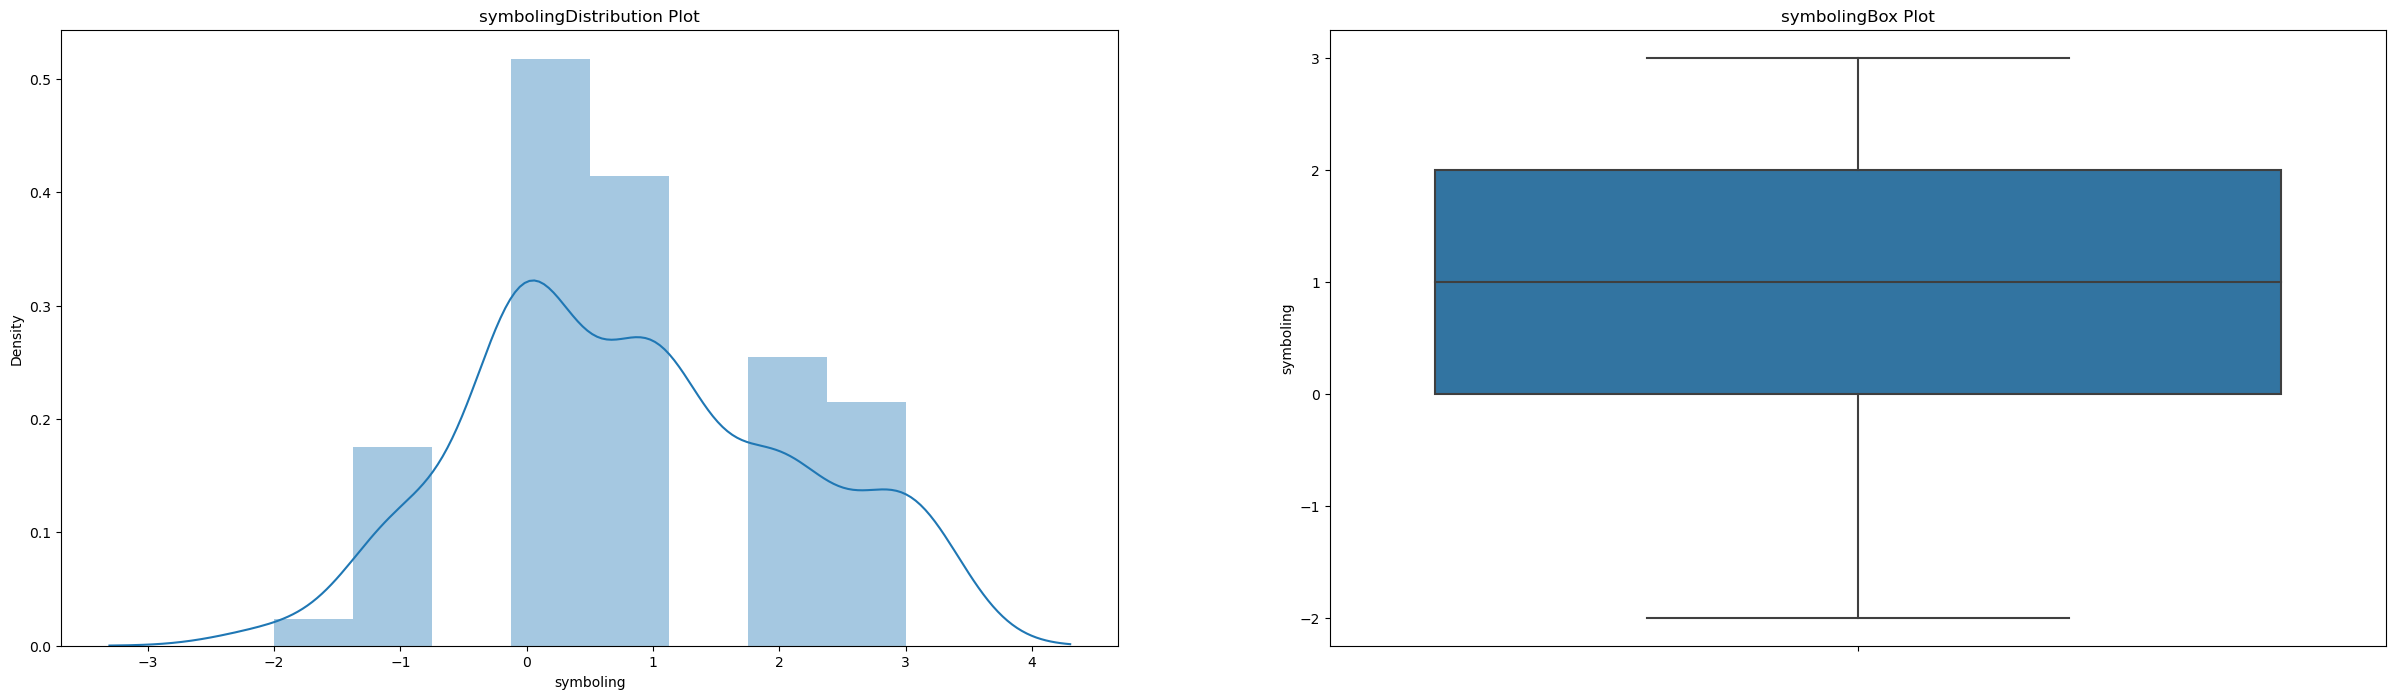

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


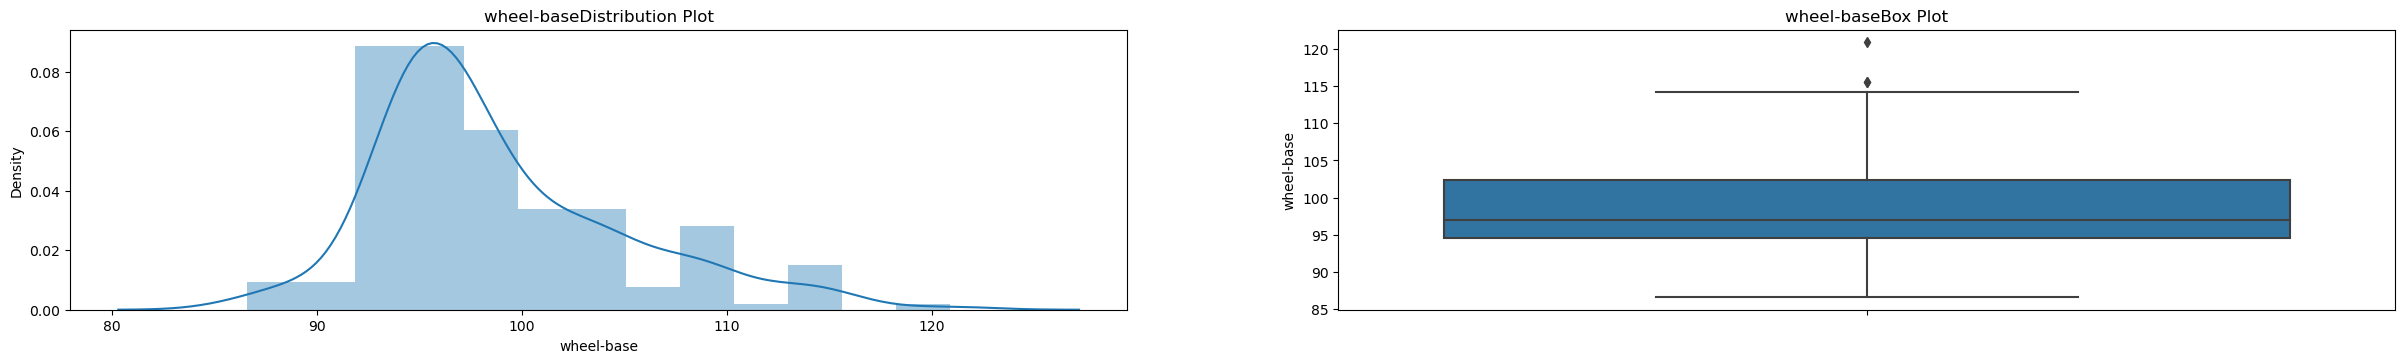

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


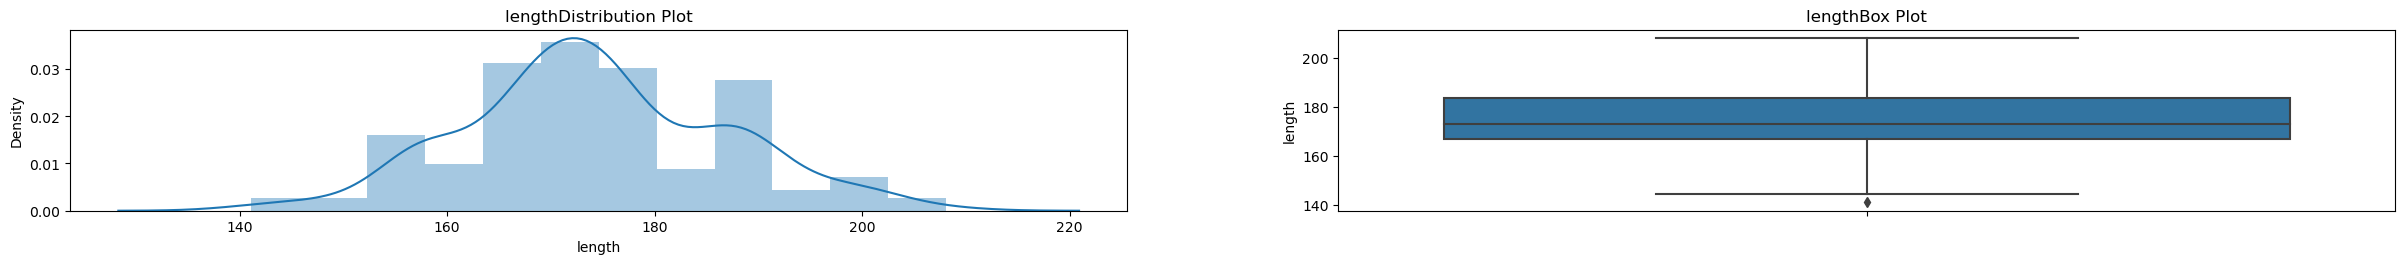

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


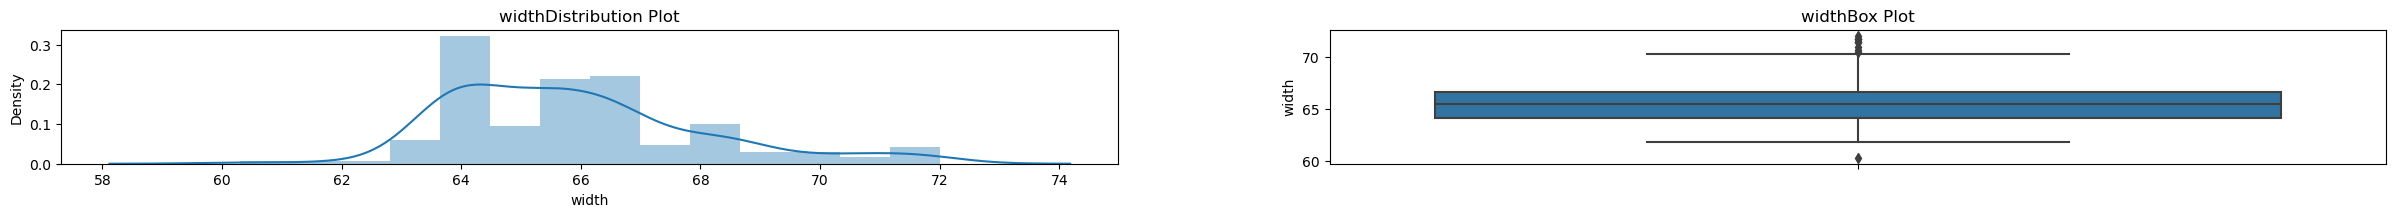

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


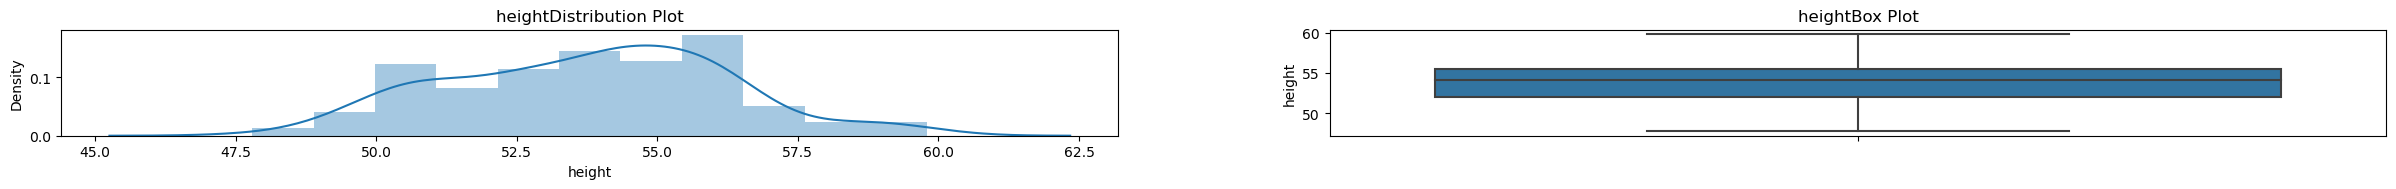

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


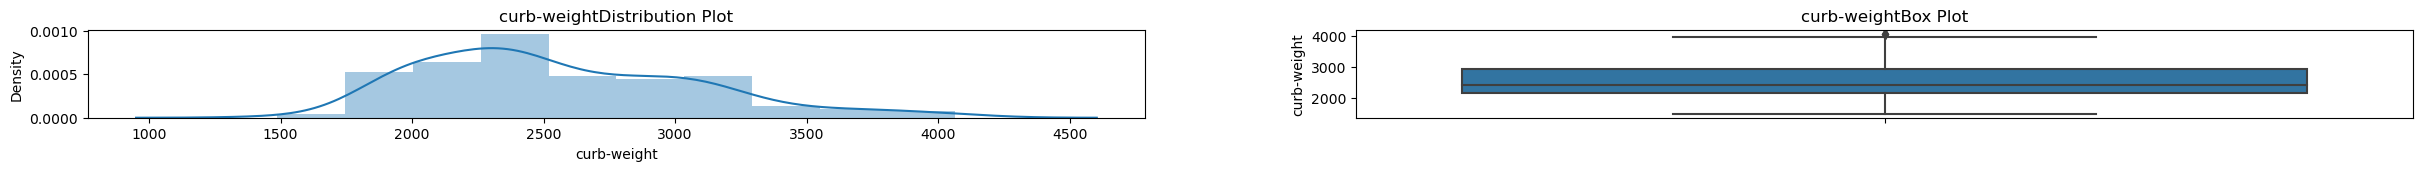

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


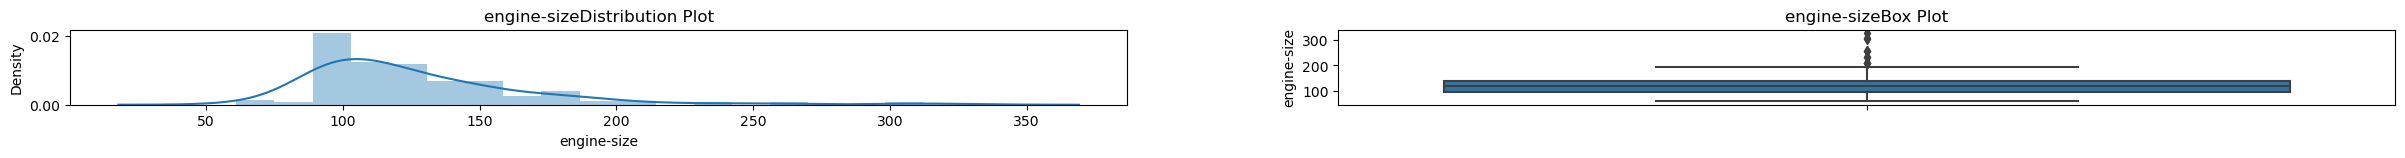

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


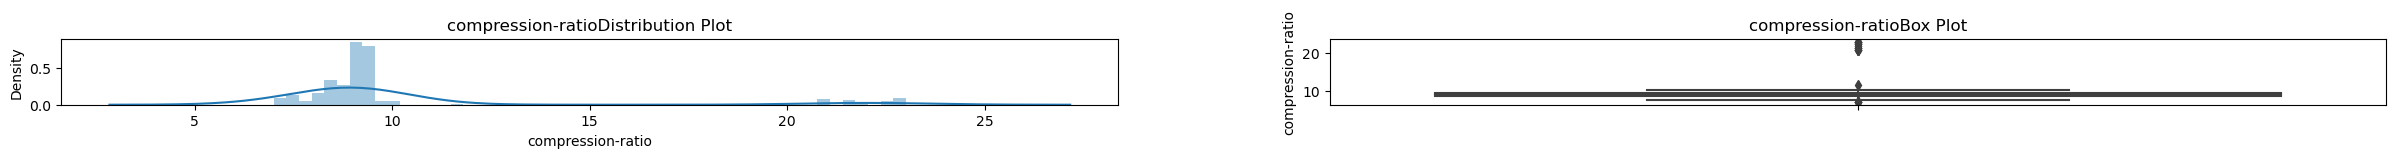

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


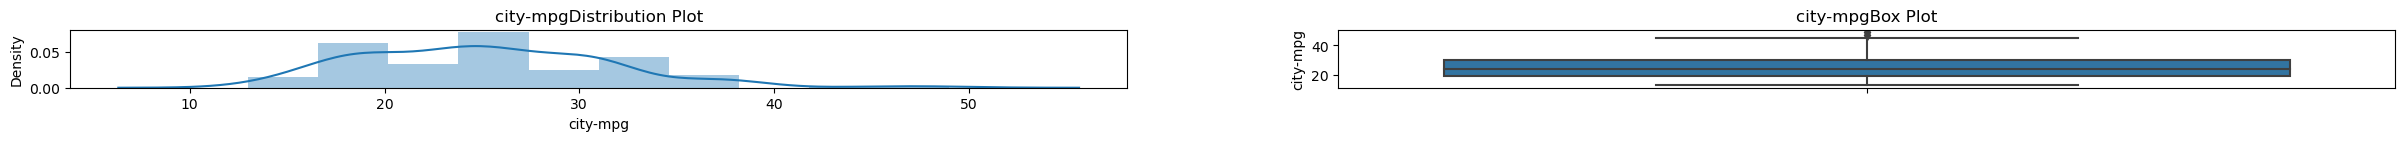

E:\Anaconda python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


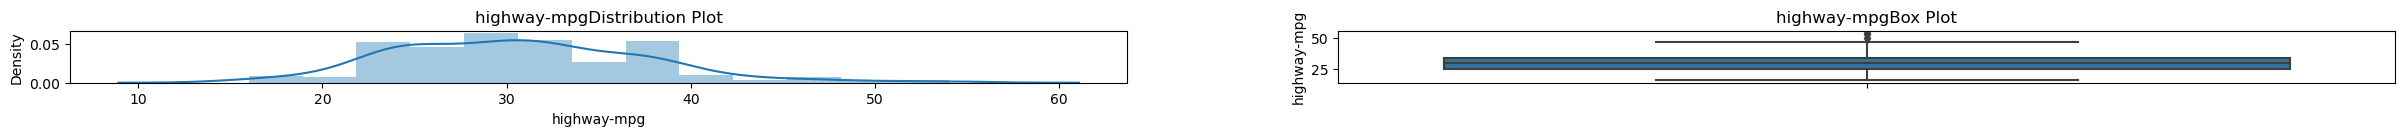

In [13]:
index = 1
for feature in numerical_feature:
    if feature not in ["normalized-losses"]:
        plt.figure(figsize=(30,8))
        # first plot 
        plt.subplot(index,2,1)
        plt.title(feature + 'Distribution Plot')
        sns.distplot(df[feature])
        # second plot
        plt.subplot(index,2,2)
        plt.title(feature + 'Box Plot')
        sns.boxplot(y=df[feature])

        plt.show()
        index = index + 1

# Now Working with categorical features

In [14]:
# Create a list to store all Categorical variable
categorical_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

print("Number of Categorical Variable ", len(categorical_feature))

df[categorical_feature].head()

Number of Categorical Variable  14


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


# Get counter plots for our categorical features

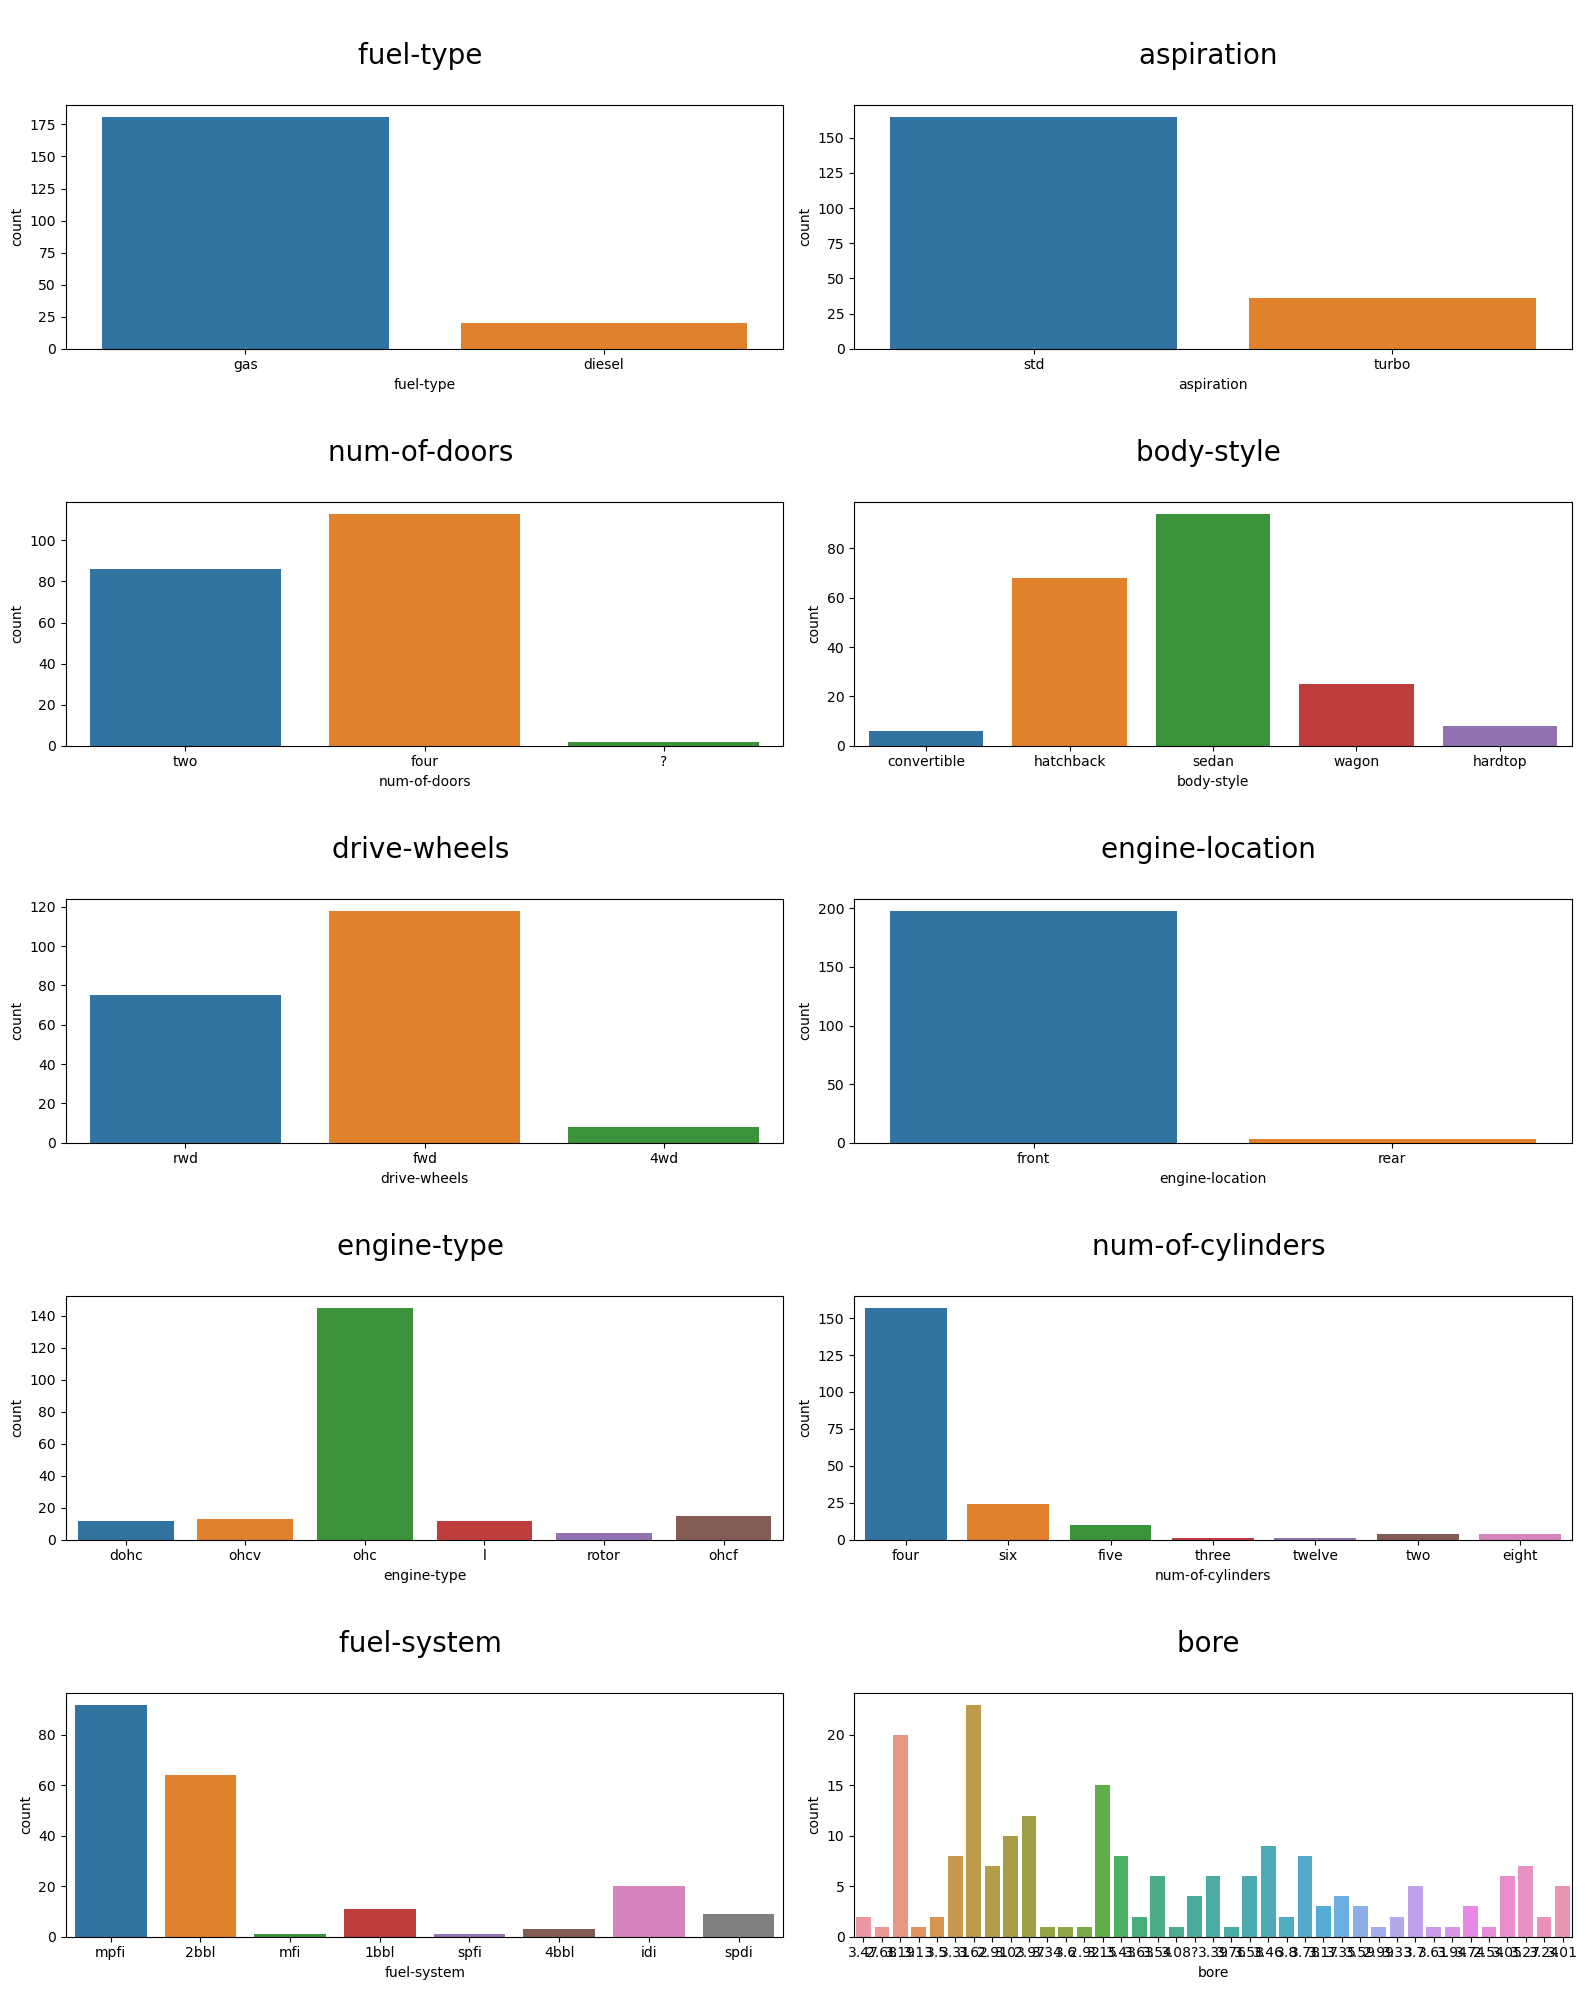

In [15]:
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = categorical_feature[i], data = df, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Box plot for each categorical features

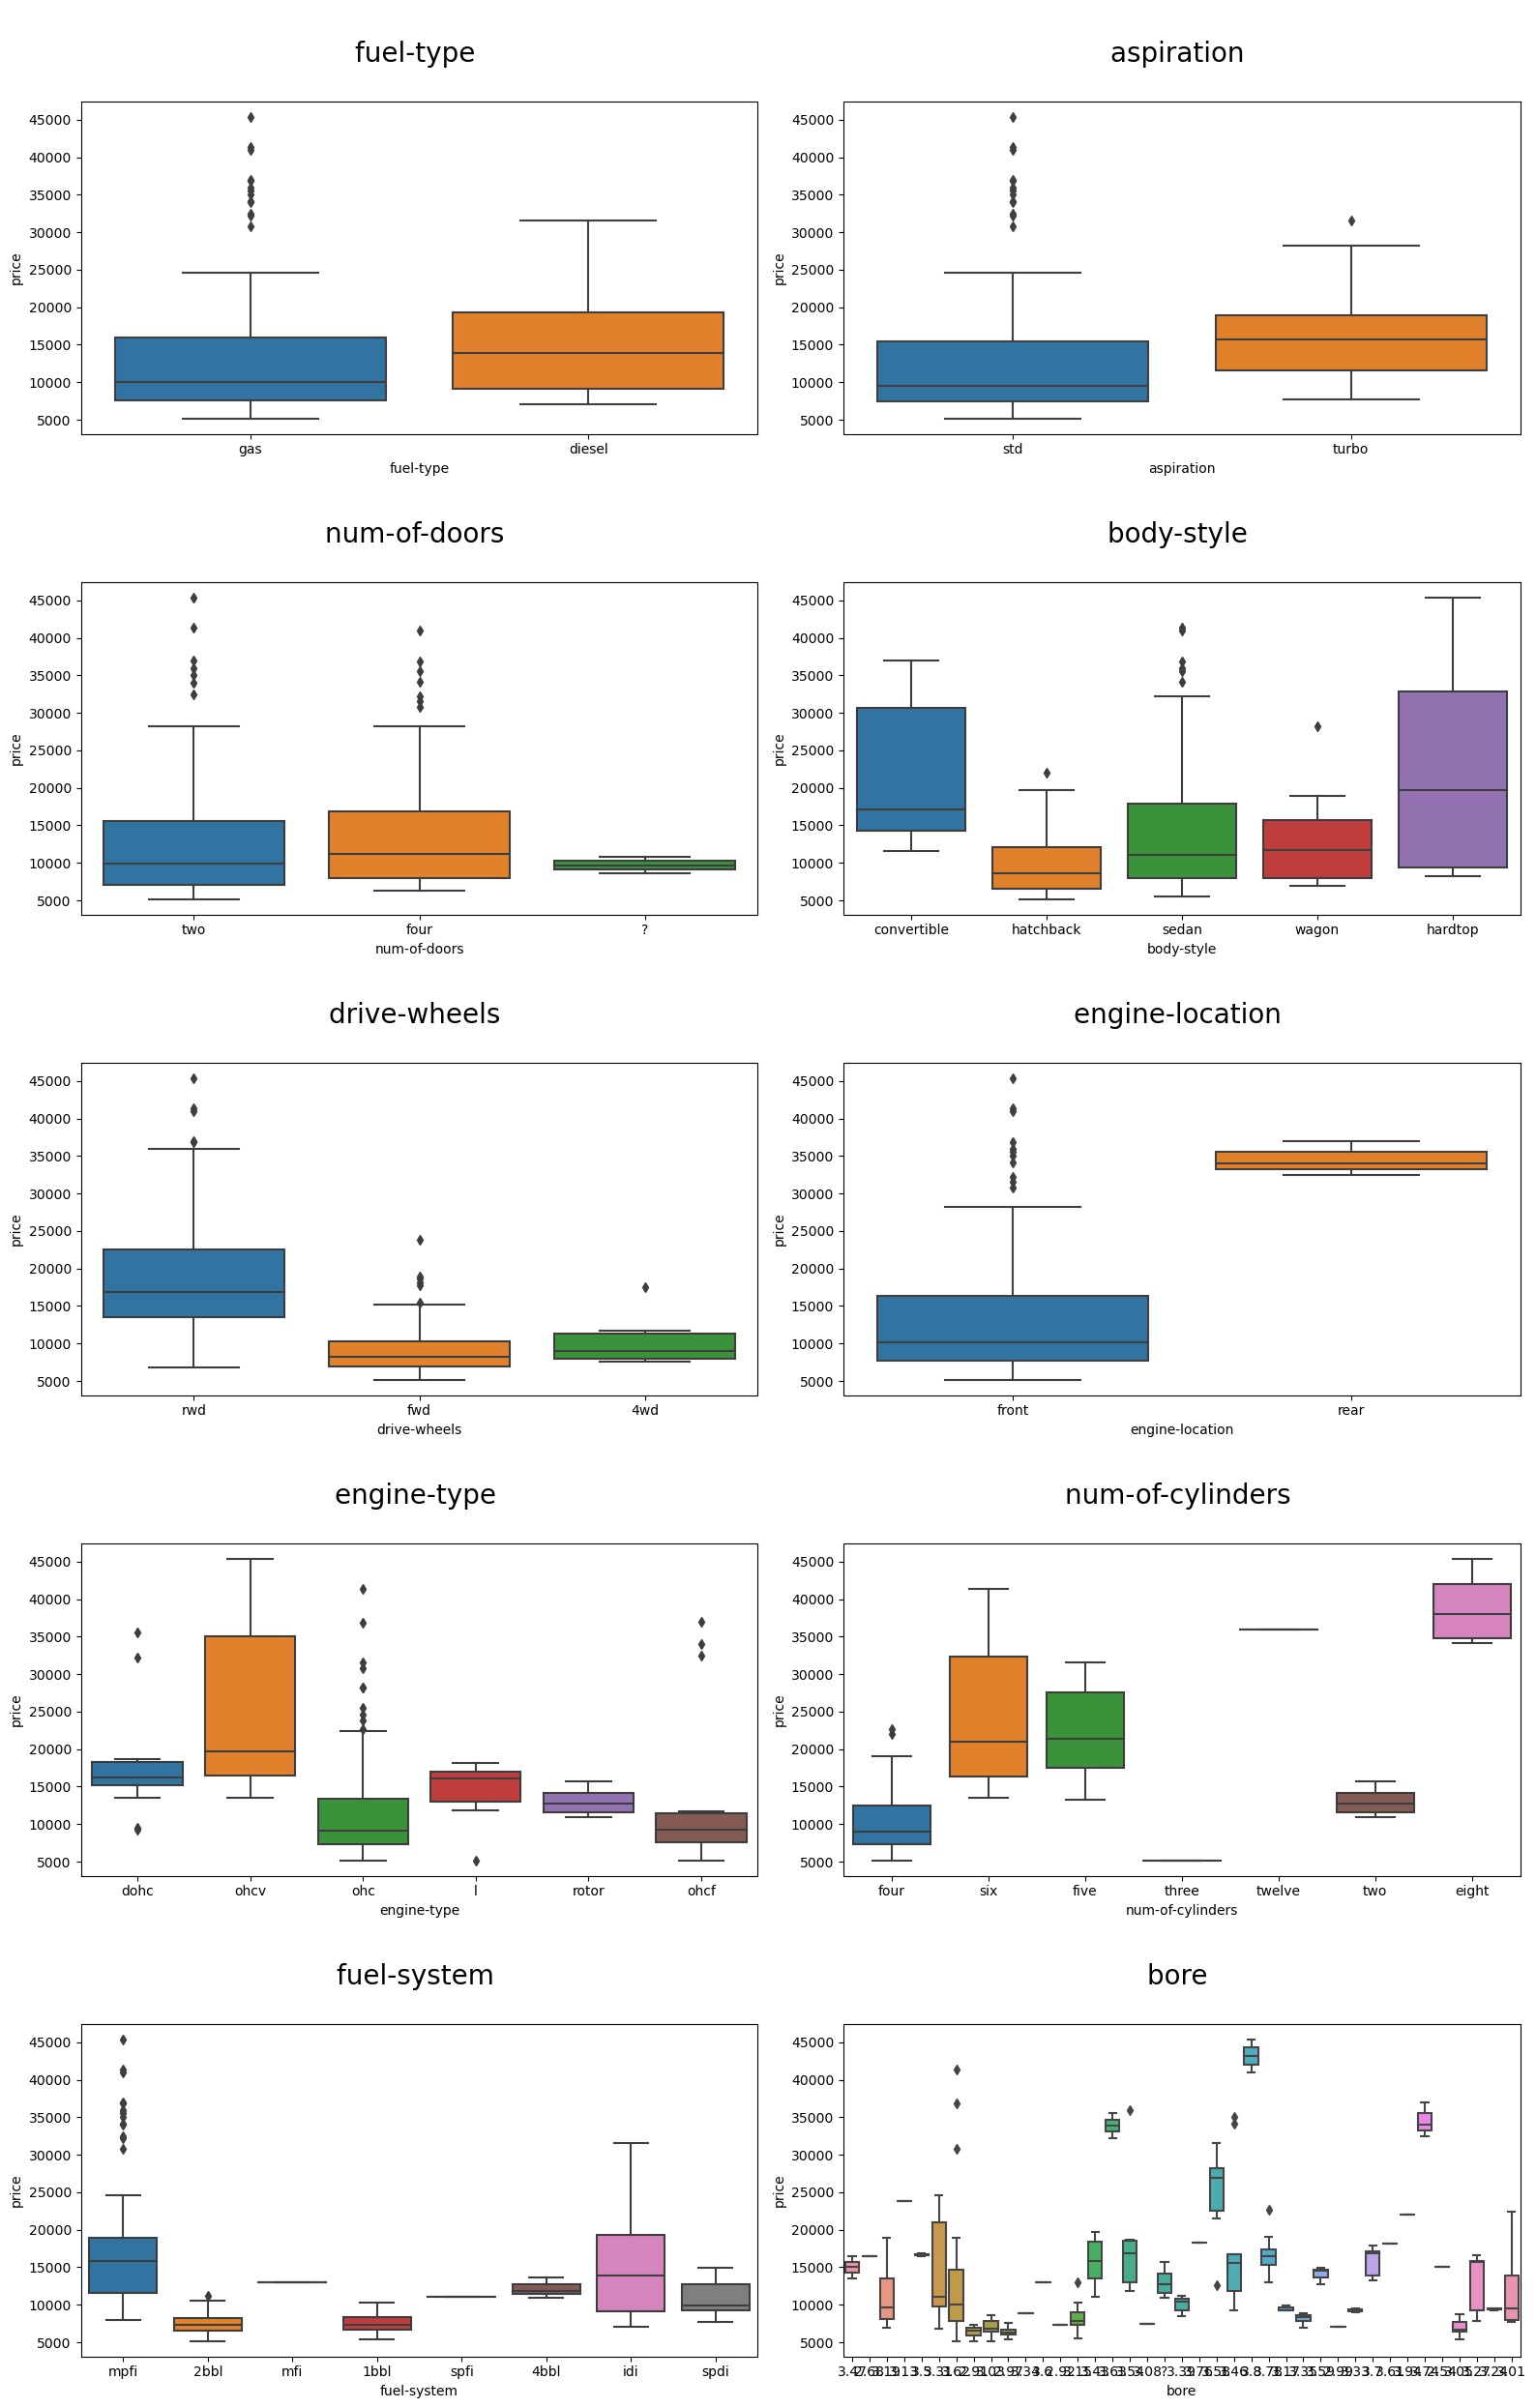

In [16]:
plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = categorical_feature[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Univeriant Analysis

In [17]:
categorical_feature

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

In [18]:
# Analysing the car name in data sheet the column been named as "make"
df["make"].count()

201

In [19]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
print(df["make"].value_counts())

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64


In [21]:
# Now extract the car company name and use it instade of make
#Splitting company name from CarName column
CompanyName = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['make'],axis=1,inplace=True)
df.head()

,symboling,normalized-losses,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Fixing invalid values There seems to be some spelling error in the CompanyName column.


porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [22]:
df["CompanyName"] = df["CompanyName"].str.lower()

def replace_name(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
#Checking for duplicates
df.loc[df.duplicated()]

,symboling,normalized-losses,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


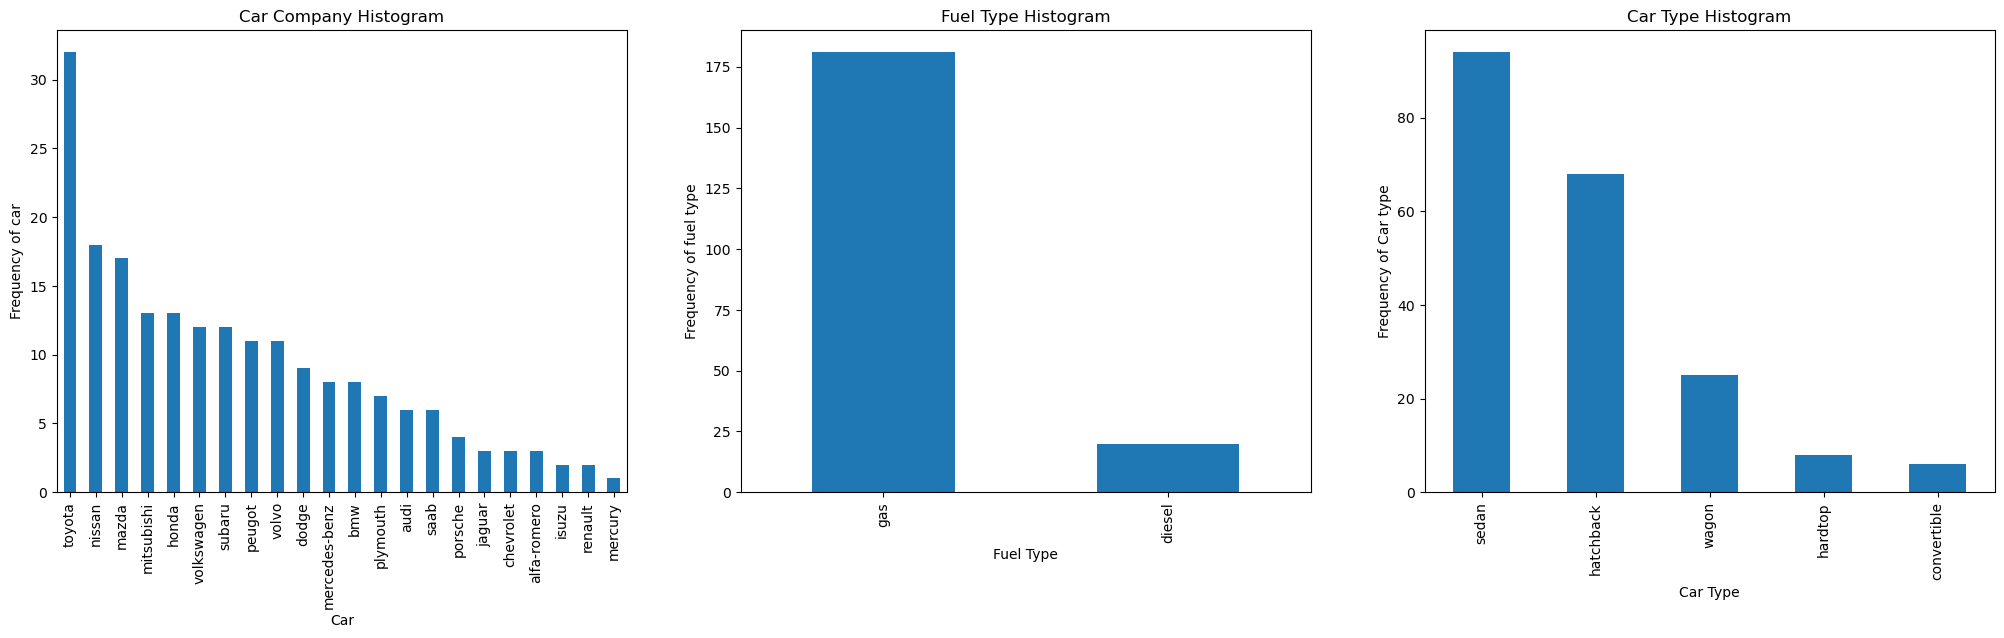

In [24]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df["CompanyName"].value_counts().plot(kind = 'bar')
plt.title('Car Company Histogram')
plt1.set(xlabel = 'Car', ylabel='Frequency of car')

plt.subplot(1,3,2)
plt1 = df["fuel-type"].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df["body-style"].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

form above graph we conclude that

Toyota seemed to be favored car company.
mercury is the less used car.
gas fueled cars are more than diesel.
sedan is the top car type prefered.

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


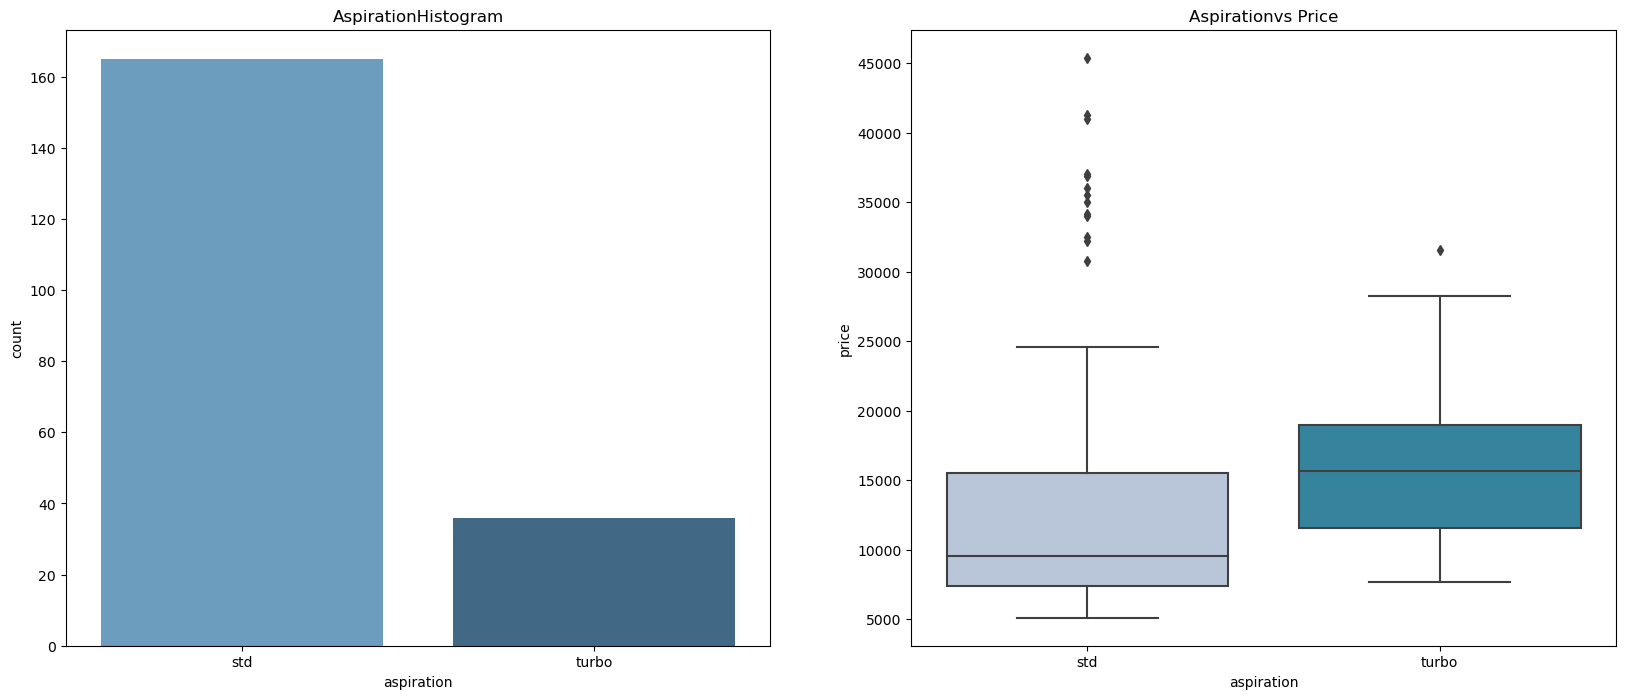

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


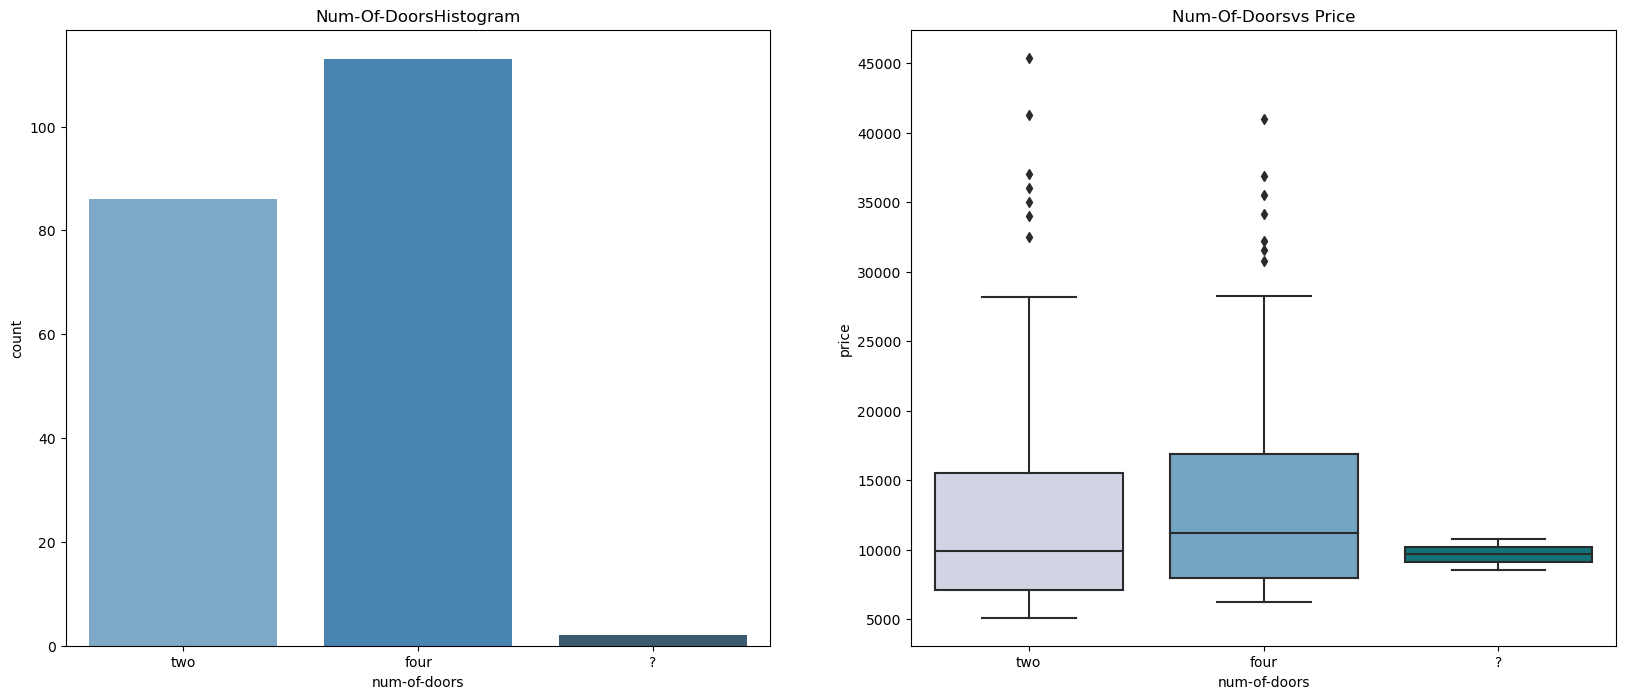

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


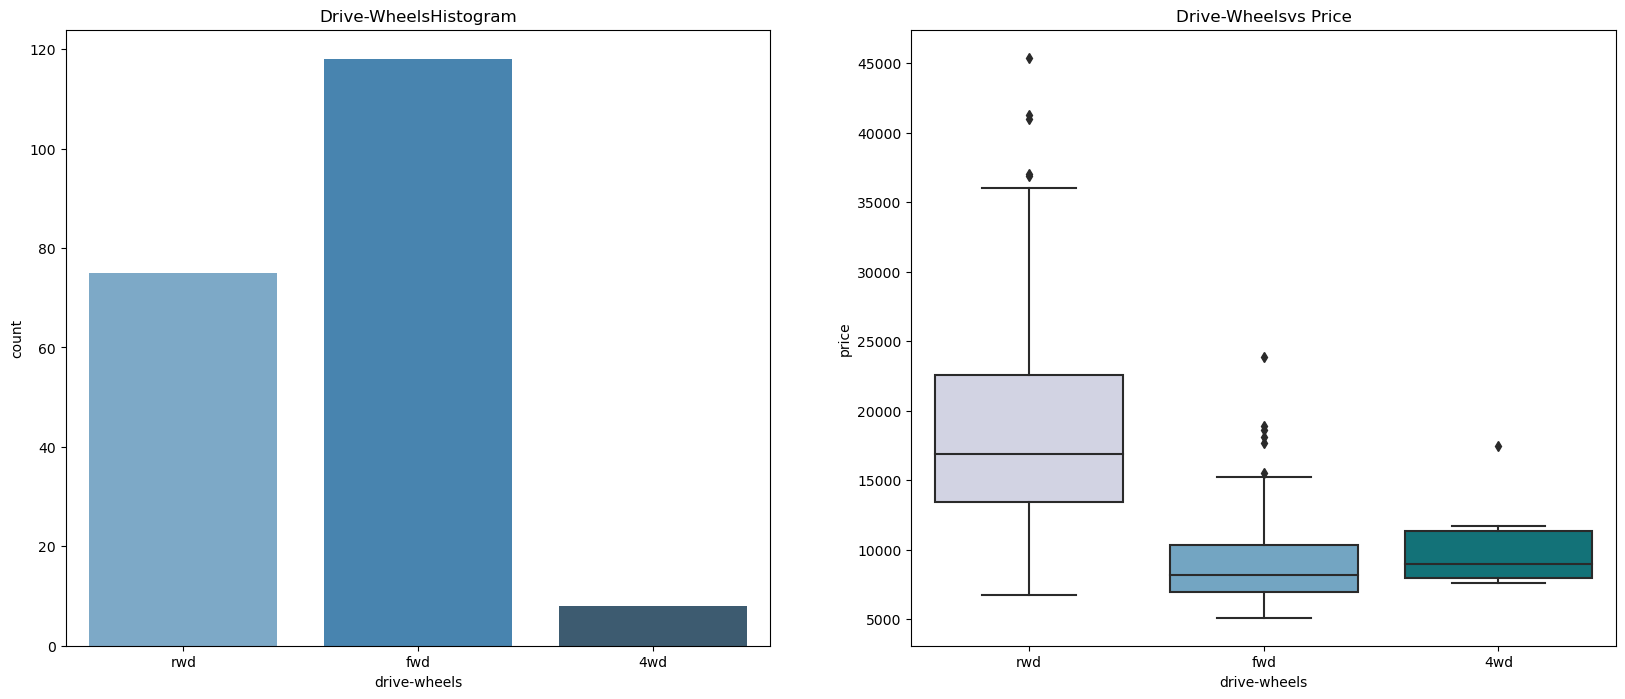

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


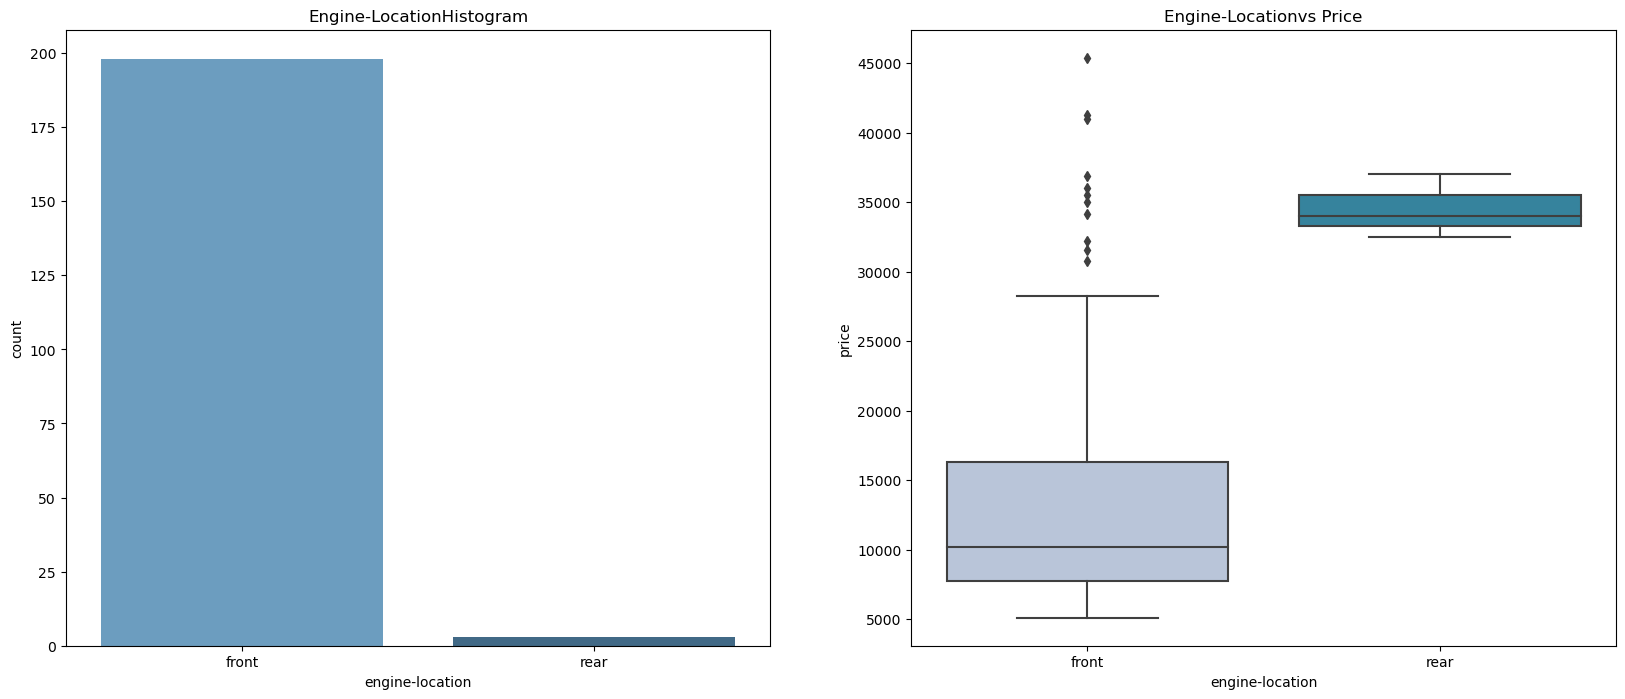

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


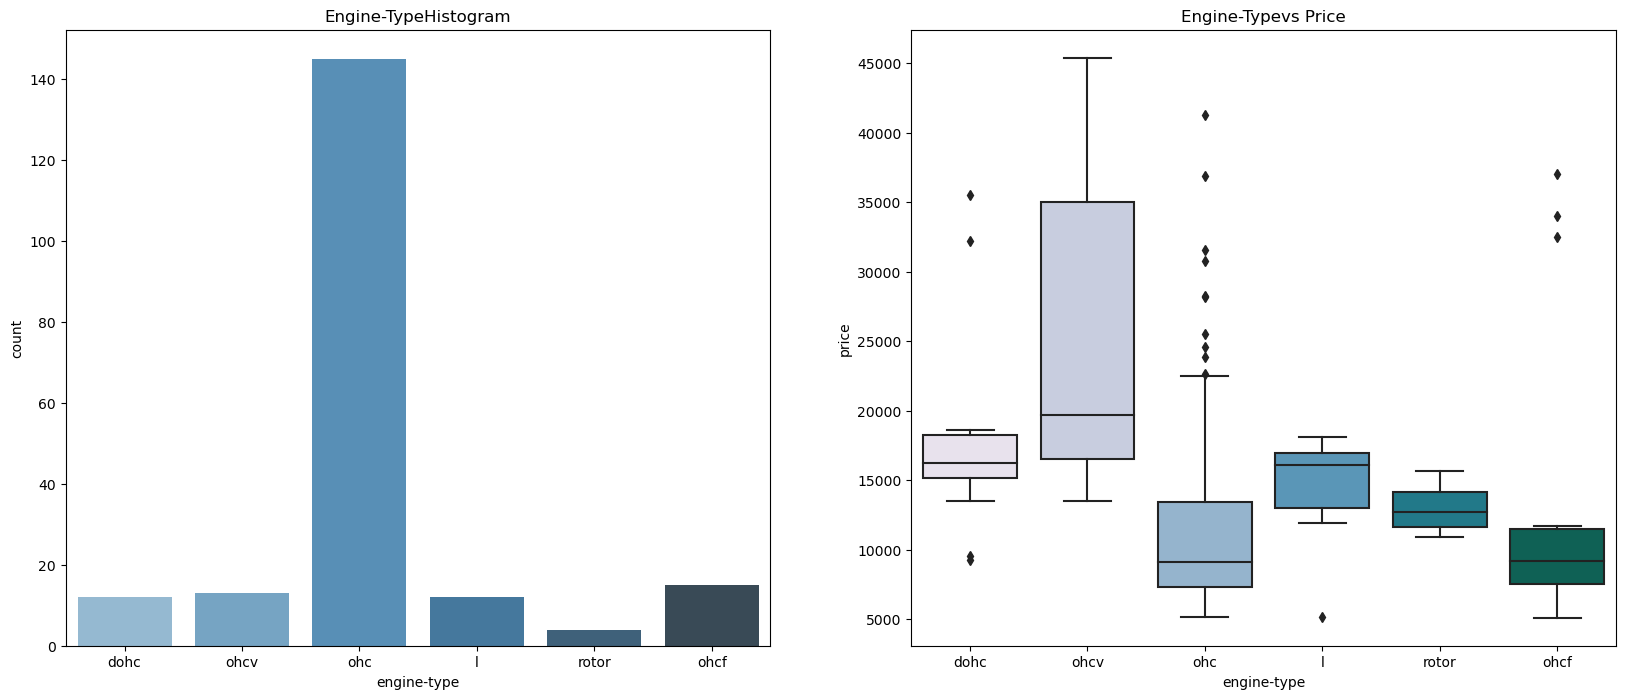

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


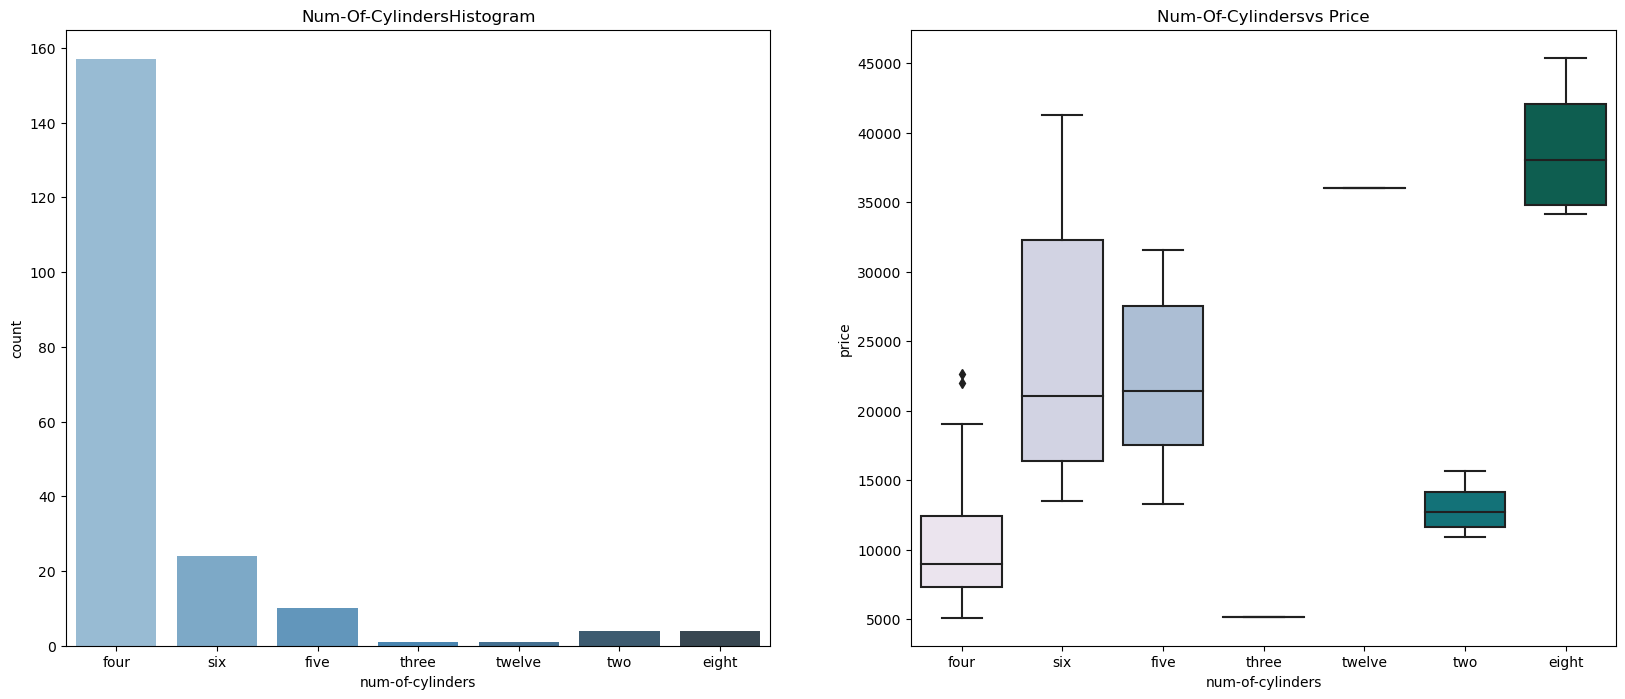

E:\Anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


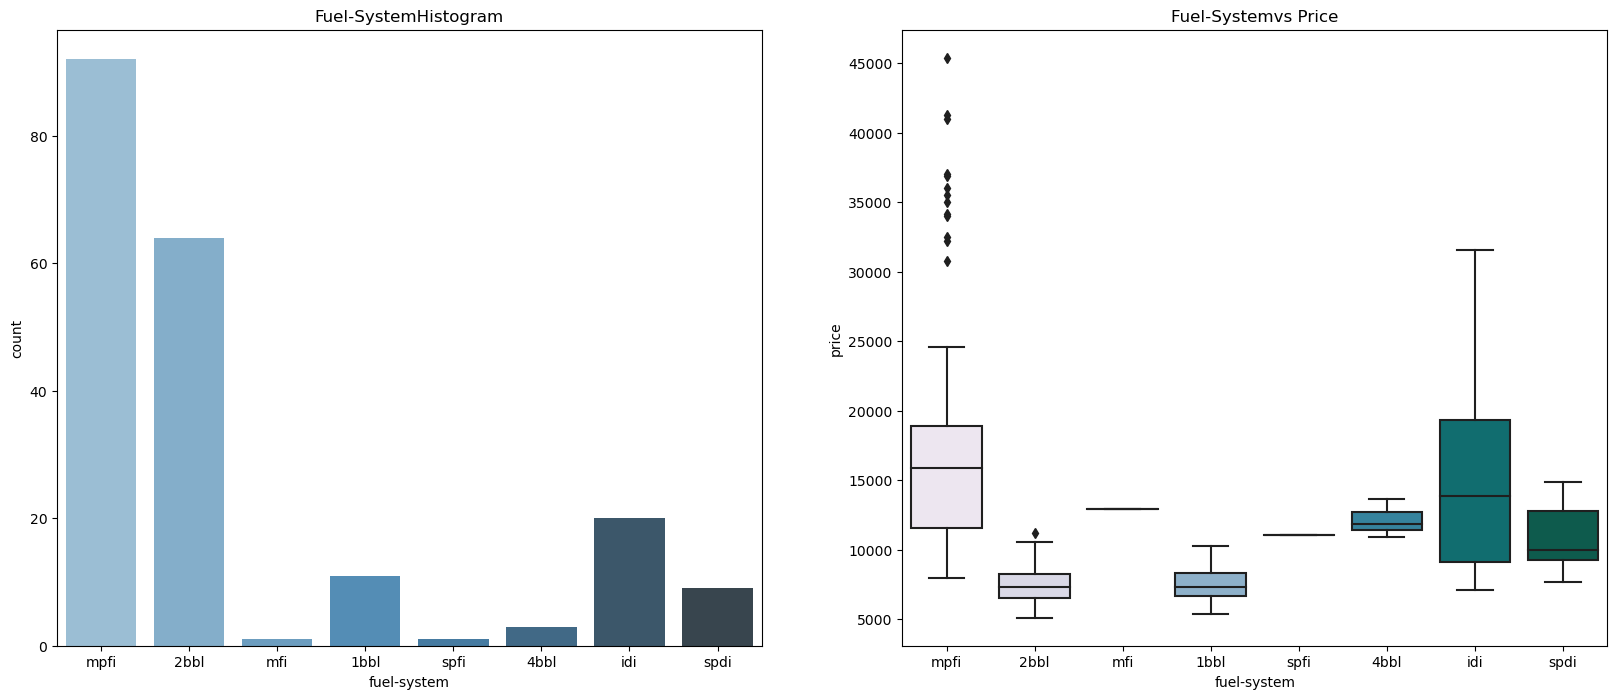

In [25]:
# Analysing other features as well 

cat_columns = ['aspiration', 'num-of-doors', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for feature in cat_columns:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(feature.title() + 'Histogram')
    sns.countplot(df[feature], palette=("Blues_d"))

    plt.subplot(1,2,2)
    plt.title(feature.title() + 'vs Price')
    sns.boxplot(x=df[feature], y=df["price"], palette=("PuBuGn"))

    plt.show()

It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
most cars have their engine on front side.
ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.
ohc Engine type seems to be most favored type.
most cars have 4 cylinder.
mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.

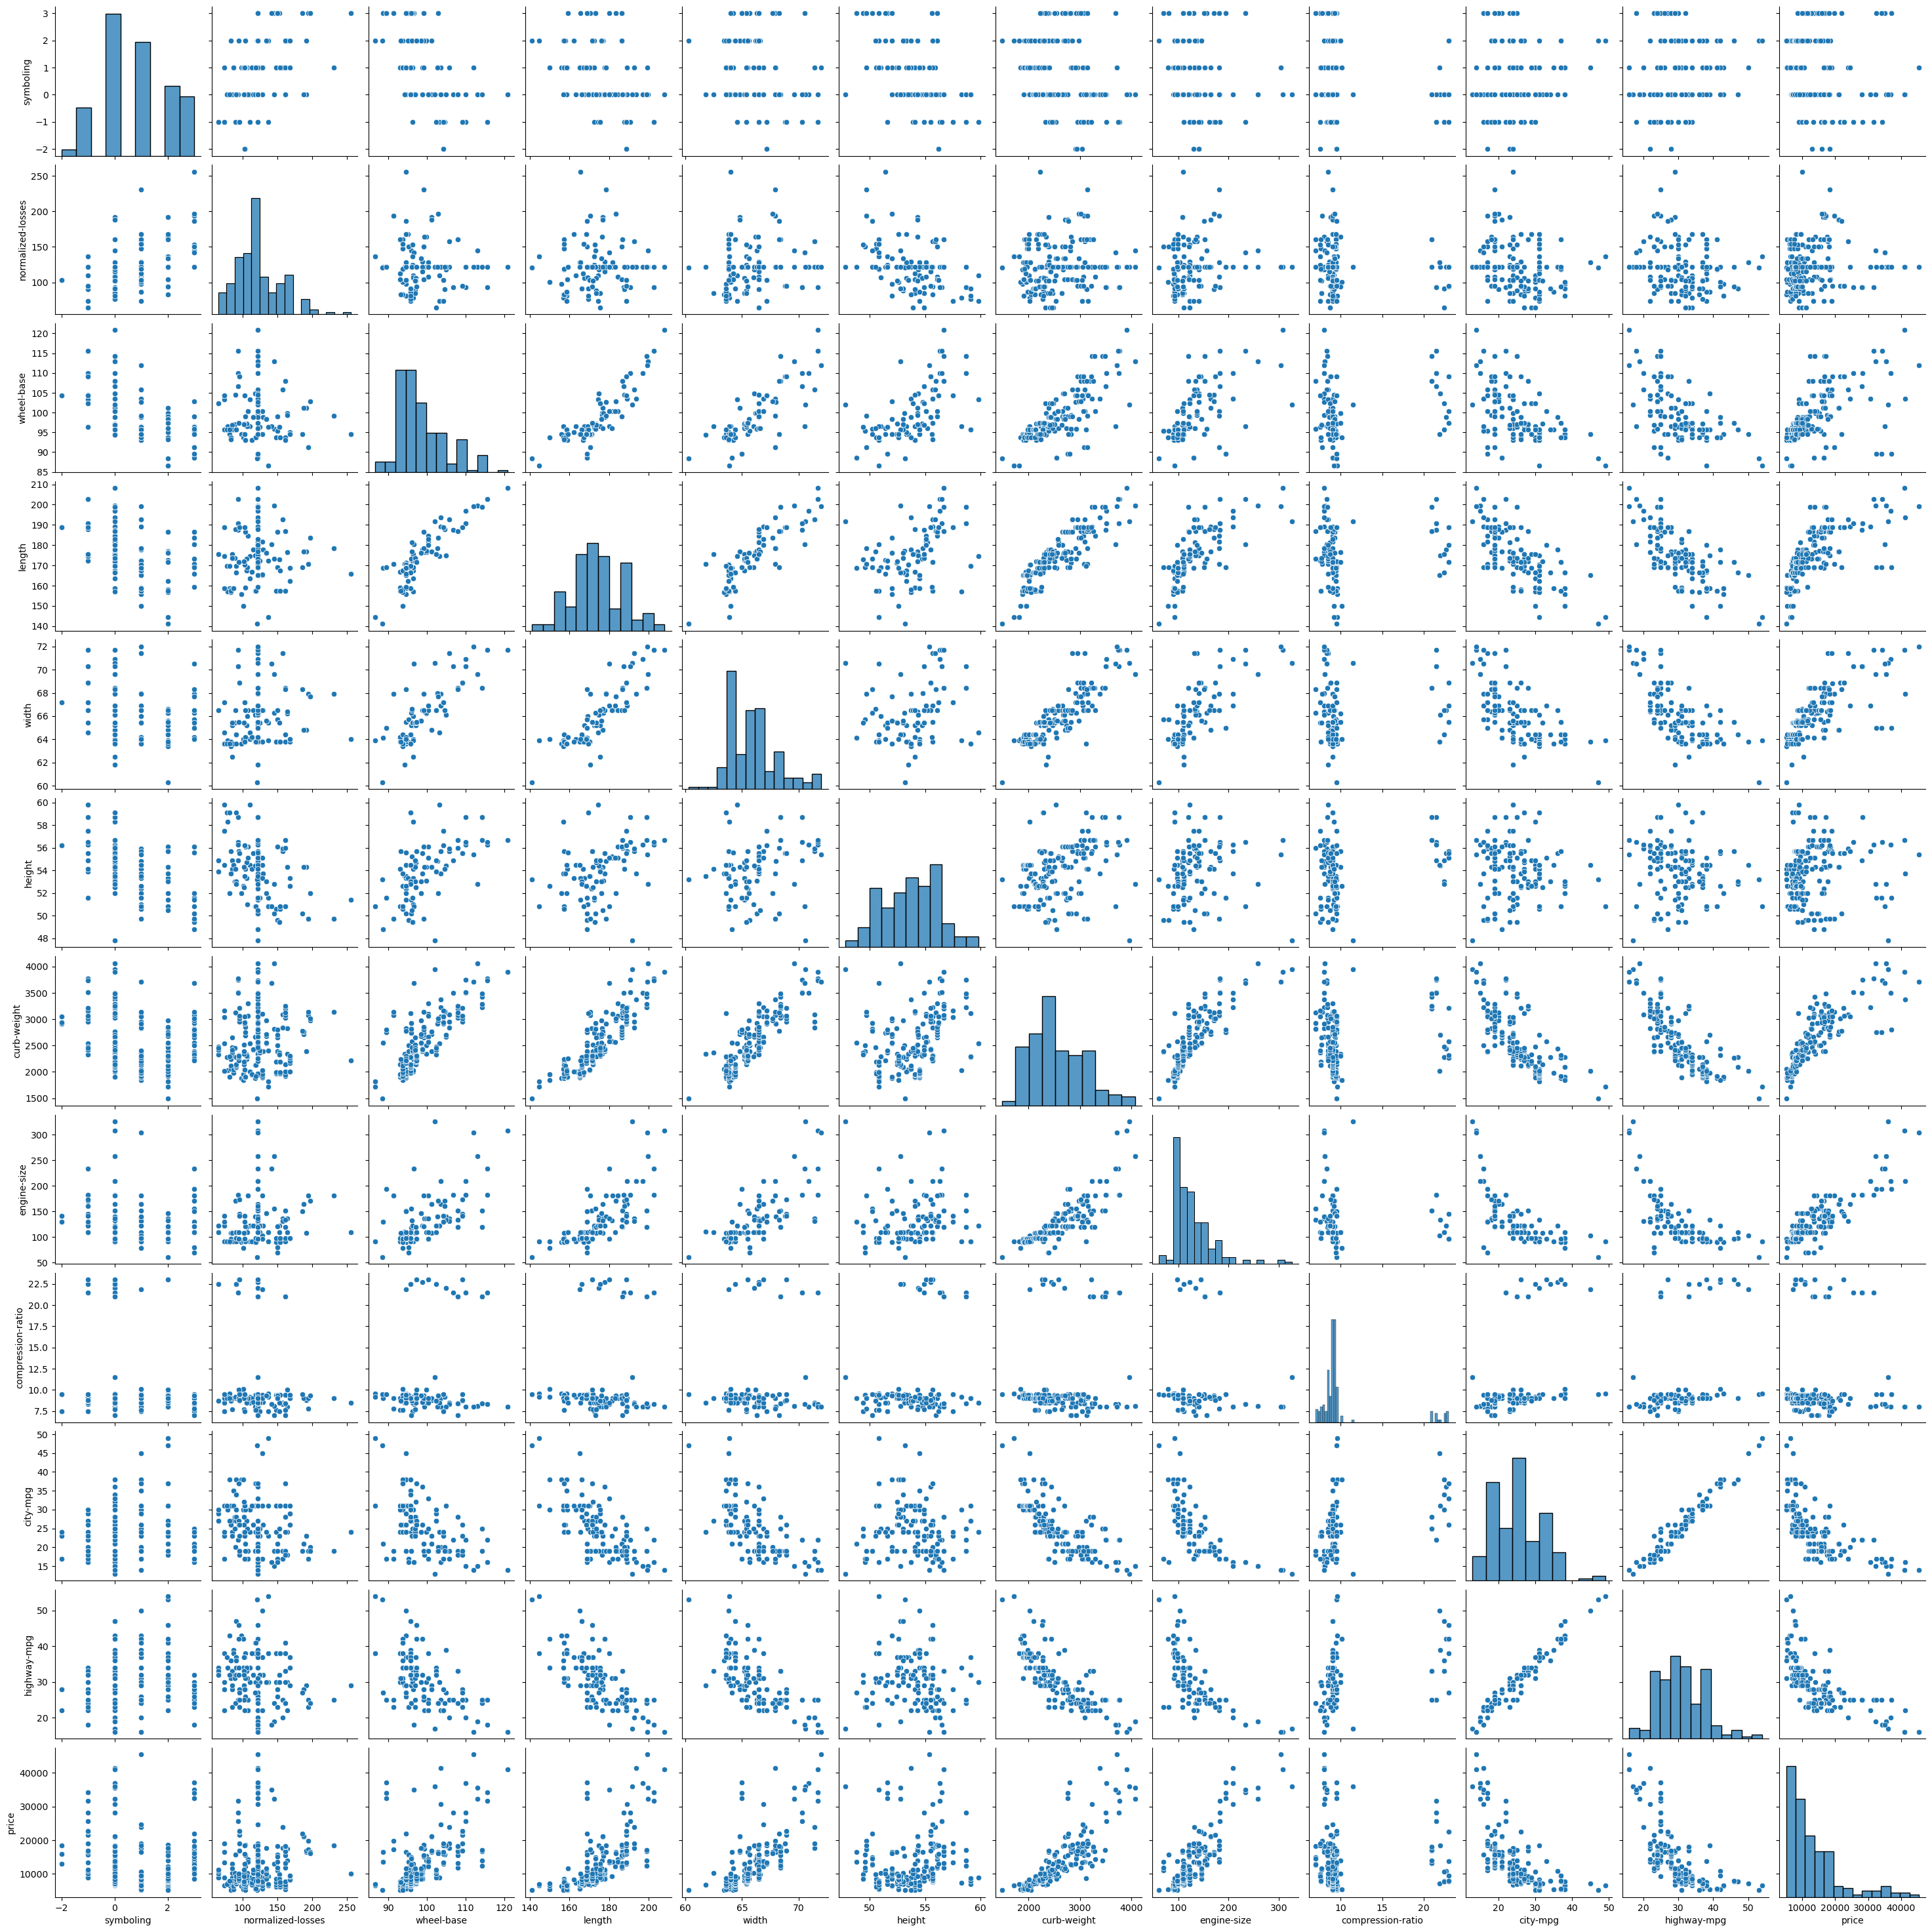

In [26]:
sns.pairplot(df)
plt.show()

# Data preprocessing

In [27]:
df.head()


,symboling,normalized-losses,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [28]:
# drop the index from dataset
df.drop(columns = ['normalized-losses'], axis = 1, inplace = True)

In [29]:
# encoding ordinal categorical columns
df['num-of-doors'] = df['num-of-doors'].map({'two': 2, 'four': 4})
df['num-of-cylinders'] = df['num-of-cylinders'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [30]:
# creating features and label variable
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [31]:
# encoding categorical columns
X = pd.get_dummies(X, drop_first = True)
X.head(10)

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,...,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,peak-rpm_?
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,10.0,...,0,0,0,1,0,0,0,0,0,0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,8.0,...,0,0,0,1,0,0,0,0,0,0
5,2,2.0,99.8,177.3,66.3,53.1,2507,5,136,8.5,...,0,0,0,1,0,0,0,0,0,0
6,1,4.0,105.8,192.7,71.4,55.7,2844,5,136,8.5,...,0,0,0,1,0,0,0,0,0,0
7,1,4.0,105.8,192.7,71.4,55.7,2954,5,136,8.5,...,0,0,0,1,0,0,0,0,0,0
8,1,4.0,105.8,192.7,71.4,55.9,3086,5,131,8.3,...,0,0,0,1,0,0,0,0,0,0
10,2,2.0,101.2,176.8,64.8,54.3,2395,4,108,8.8,...,0,0,0,0,0,1,0,0,0,0


In [32]:
X.shape

(201, 208)

# checking for multicollinearity using `VIF` and `correlation matrix`

In [33]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'X' containing the variables

# Check if DataFrame X is empty
if X.empty:
    print("DataFrame 'X' is empty. Please provide valid data.")
else:
    # Check for missing or NaN values in DataFrame X
    if X.isnull().values.any():
        X = X.dropna()  # Drop rows with missing values

    # Calculate VIF if DataFrame X has at least one column
    if X.shape[1] > 0:
        vif = pd.DataFrame()
        vif['Variable'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Sort the VIF values in descending order
        vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
        pd.set_option("display.max_rows", None, "display.max_columns", None)
        print(vif)
    else:
        print("DataFrame 'X' does not contain any variables.")


E:\Anaconda python\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
E:\Anaconda python\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                      Variable           VIF
0                   stroke_3.1           inf
1               horsepower_134           inf
2               horsepower_106           inf
3               horsepower_110           inf
4               horsepower_111           inf
5               horsepower_112           inf
6               horsepower_114           inf
7               horsepower_115           inf
8               horsepower_116           inf
9               horsepower_120           inf
10              horsepower_121           inf
11              horsepower_123           inf
12              horsepower_135           inf
13              horsepower_175           inf
14              horsepower_140           inf
15              horsepower_142           inf
16              horsepower_143           inf
17              horsepower_145           inf
18              horsepower_152           inf
19              horsepower_154           inf
20              horsepower_155           inf
21        

Dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)
The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required. When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

In [34]:
X = X.drop([      'stroke_3.1', 'horsepower_134','horsepower_106','horsepower_110','horsepower_111','horsepower_112' , 'horsepower_114' ,'horsepower_115',        
'horsepower_116'  , 'horsepower_120'  , 'horsepower_121' , 'horsepower_123' ,'horsepower_135', 'horsepower_175' , 'horsepower_140'  ,        
'horsepower_142'  , 'horsepower_143'  , 'horsepower_145'  ,'horsepower_152' ,'horsepower_154' , 'horsepower_155' , 'horsepower_156'    ,      
'horsepower_160'   ,       
'horsepower_161'   ,       
'horsepower_101'   ,       
'stroke_?' ,'stroke_4.17'     ,     
'stroke_3.9'     ,    
'stroke_3.11'   ,       
'stroke_3.12' ,        
'stroke_3.15' ,        
'stroke_3.16'  ,        
'stroke_3.19'  ,        
'stroke_3.21',         
'stroke_3.23'  ,        
'stroke_3.27'  ,      
'stroke_3.29'  ,        
'stroke_3.35'  ,        
'stroke_3.39' ,         
'stroke_3.4'  ,       
'stroke_3.41'  ,        
'stroke_3.46'  ,        
'stroke_3.47'  ,        
'stroke_3.5'   ,       
'stroke_3.52'   ,       
'stroke_3.54'   ,       
'stroke_3.58'  ,        
'stroke_3.64' ,         
'stroke_3.86'   ,       
'horsepower_162'  ,        
'horsepower_176' ,         
'stroke_3.07'  ,       
'peak-rpm_5000' ,        
'horsepower_97'  ,       
'horsepower_?'  ,     
'peak-rpm_4200'   ,       
'peak-rpm_4250'    ,      
'peak-rpm_4350'   ,       
'peak-rpm_4400'  ,        
'peak-rpm_4500'  ,       
'peak-rpm_4750' ,         
'peak-rpm_4800',
'peak-rpm_4900'  ,       
'peak-rpm_5100'   ,       
'horsepower_182' ,         
'peak-rpm_5200'  ,       
'peak-rpm_5250' ,         
'peak-rpm_5300'  ,        
'peak-rpm_5400' ,         
'peak-rpm_5500'  ,        
'peak-rpm_5600' ,         
'peak-rpm_5800' ,         
'peak-rpm_5900'  ,        
'peak-rpm_6000' ,         
'peak-rpm_6600'   ,       
'horsepower_95'  ,        
'horsepower_94' ,        
'horsepower_92' ,         
'horsepower_86'   ,       
'horsepower_184'  ,        
'horsepower_200'  ,        
'horsepower_207',          
'horsepower_262' ,        
'horsepower_48'  ,      
'horsepower_55'  ,        
'horsepower_56'  ,        
'horsepower_58'   ,       
'horsepower_60',
'horsepower_62'  ,        
'horsepower_68'   ,       
'horsepower_69'   ,       
'horsepower_70'   ,       
'horsepower_72'  ,        
'horsepower_73' ,         
'horsepower_76' ,         
'horsepower_78' ,         
'horsepower_82',
'horsepower_84' ,         
'horsepower_85' ,         
'stroke_3.08'  ,        
'peak-rpm_?'     ,   
'stroke_3.03'   ,       
'fuel-system_2bbl'  ,        
'CompanyName_volvo'   ,       
'fuel-type_gas'      ,    
'engine-location_rear' ,        
'engine-type_l'       ,   
'engine-type_ohc'   ,       
'engine-type_ohcf'  ,        
'engine-type_ohcv'  ,        
'engine-type_rotor' ,         
'fuel-system_4bbl' ,         
'bore_3.01'       ,   
'fuel-system_idi'  ,       
'fuel-system_mpfi' ,         
'fuel-system_spfi',   'fuel-system_spdi',   
'bore_2.68'     ,     
'bore_2.91'     ,    
'bore_2.92'    ,     
'bore_2.97'   ,       
'CompanyName_volkswagen'  ,        
'CompanyName_toyota'     ,     
'CompanyName_subaru'   ,      
'CompanyName_saab',
'num-of-cylinders'   ,       
'CompanyName_audi'    ,     
'CompanyName_bmw'  ,        
'CompanyName_chevrolet',          
'CompanyName_dodge'   , 'CompanyName_honda'  ,'CompanyName_isuzu'  , 'CompanyName_jaguar' , 'CompanyName_mazda'    ,'CompanyName_mercedes-benz' ,'CompanyName_mercury' , 'CompanyName_mitsubishi','CompanyName_nissan'  , 'CompanyName_peugot' , 'CompanyName_plymouth' ,
'CompanyName_porsche' , 'CompanyName_renault', 'bore_2.99'       , 'fuel-system_mfi' , 'bore_3.03'    , 'bore_3.5'   , 'bore_3.58','bore_3.59','bore_3.05','bore_3.61'  ,'bore_3.62'  ,'bore_3.63'  , 'bore_3.7'   , 'bore_3.74'   , 'bore_3.76'  , 'bore_3.78','bore_3.8','bore_3.94' ,       
'bore_?', 'stroke_2.19' ,'stroke_2.36','stroke_2.64', 'stroke_2.68','stroke_2.8','stroke_2.76', 'stroke_2.87' ,'stroke_2.9' ,'bore_3.54','bore_3.6'  ,'bore_3.34','bore_3.27','bore_3.33' ,'bore_3.24','bore_3.35','bore_3.39' ,'bore_3.43' ,'bore_3.19'  ,     
'bore_3.46', 'bore_3.17'  ,'bore_3.15' , 'bore_3.08' ,'bore_3.31' ,'bore_3.47', 'peak-rpm_4650' , 'horsepower_64'], axis = 1)

# Splitting data into traing and testing set

In [35]:
from sklearn.model_selection import train_test_split

# Check the number of samples in X and y
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

# Drop any missing values in X and y and ensure consistent samples
X = X.dropna()
y = y.loc[X.index]

# Recheck the number of samples in X and y after dropping missing values
print("Number of samples in X after dropping missing values:", X.shape[0])
print("Number of samples in y after dropping missing values:", y.shape[0])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)





Number of samples in X: 199
Number of samples in y: 201
Number of samples in X after dropping missing values: 199
Number of samples in y after dropping missing values: 199


In [36]:
print("Traing Data Shape of x and y respectively:  ", X_train.shape, y_train.shape)
print("Testing Data Shape of x and y respectively:  ", X_test.shape, y_test.shape)

Traing Data Shape of x and y respectively:   (133, 23) (133,)
Testing Data Shape of x and y respectively:   (66, 23) (66,)


# Model Building and Model Evaluation on different models

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
# Calculate the score of the XGBoost model on the test data
score = lr_model.score(X_test, y_test)

# Print the score
print("Model Score: {:.2f}".format(score))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)


Model Score: 0.81


In [42]:
y_pred = lr_model.predict(X_test)

In [43]:
mse

19761224.372081228

In [44]:
rmse = np.sqrt(mse)
rmse

4445.359869805956

In [45]:
from sklearn.ensemble import RandomForestRegressor    # Random Forest Regressor ensemble technique

# Create a Random Forest regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Calculate the score of the XGBoost model on the test data
score = rf_model.score(X_test, y_test)

# Print the score
print("Model Score: {:.2f}".format(score))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)
y_pred = rf_model.predict(X_test)

Model Score: 0.89


In [46]:
y_pred = rf_model.predict(X_test)


In [47]:
mse


19761224.372081228

In [48]:
import xgboost as xgb

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Calculate the score of the XGBoost model on the test data
score = xgb_model.score(X_test, y_test)

# Print the score
print("Model Score: {:.2f}".format(score))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)


Model Score: 0.89


In [49]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Create a Bagging Regressor with the Linear Regression model as the base estimator
bagging_model = BaggingRegressor(base_estimator=lr_model, n_estimators=10, random_state=42)

# Fit the Bagging Regressor to the training data
bagging_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bagging_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.7721211243895694


In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

adaboost_model = AdaBoostRegressor(base_estimator=LinearRegression())
adaboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8198901844520101


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8879399820694671


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
 

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9151689824134046


# Conclusions

We used several regression models to fit our data and it seems that they all succeeded to fit the data well and this indicated that the data preprocessing stage was also a success but we're still facing the problem of overfitting. So I am done the next stage of improvement to reduce overfitting by ensemble techniques.

Last we get the 91.2135478169% accuract on the emsemble technique (Gradient boosting regressor)